<a href="https://colab.research.google.com/github/Kaizensk/WorldBank-global-Education-analysis/blob/main/WorldBank_Global_Education_Analysis_cohort_nilgiri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Capstone Project - 1 : WorldBank Global Education Analysis**

## **The World Bank EdStats All Indicator Query holds over 4,000 internationally comparable indicators that describe education access, progression, completion, literacy, teachers, population, and expenditures.The indicators cover the education cycle from pre-primary to vocational and tertiary education and also holds learning outcome data from international and regional learning assessments (e.g. PISA, TIMSS, PIRLS), equity data from household surveys, and projection/attainment data.**

## **Explore and analyze the data to identify variation of indicators across the globe, which countries are more alike and different. Feel free to add more extensive analyses and details.** 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Data Pre-processing**

**Importing required libraries**

In [ ]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Path for the dataset**

In [ ]:
#path for the dataset
path='/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 1/Capstone project/'

### **Basic Analysis of EdStatsCountry-Series.csv**

In [ ]:
#reading EdStatsCountry-Series.csv data
df_countryseries=pd.read_csv(path+'EdStatsCountry-Series.csv')

In [ ]:
df_countryseries.tail()

,CountryCode,SeriesCode,DESCRIPTION
608,ZAF,SP.POP.GROW,"Data sources : Statistics South Africa, United..."
609,ZMB,SP.POP.GROW,Data sources: United Nations World Population ...
610,ZMB,SP.POP.TOTL,Data sources : United Nations World Population...
611,ZWE,SP.POP.TOTL,Data sources : United Nations World Population...
612,ZWE,SP.POP.GROW,Data sources: United Nations World Population ...


In [ ]:
df_countryseries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


In [ ]:
df_countryseries=df_countryseries.drop('Unnamed: 3',axis=1)

In [ ]:
#getting uniquee country codes from the dataframe
df_countryseries['CountryCode'].nunique()

211

In [ ]:
df_countryseries.loc[0,'CountryCode']

'ABW'

In [ ]:
df_countryseries['SeriesCode'].nunique()

21

In [ ]:
df_countryseries.loc[7,'DESCRIPTION']

'Estimates are based on regression.'

**The description column can be removed as it's not contributing to the analysis.**

In [ ]:
#dropping the description column
df_countryseries_nodesc=df_countryseries.drop('DESCRIPTION',axis=1)

In [ ]:
df_countryseries_nodesc.describe()

,CountryCode,SeriesCode
count,613,613
unique,211,21
top,MDA,SP.POP.TOTL
freq,18,211


### **Basic Analysis of EdStatsCountry.csv file**


In [ ]:
df_StatsCountry=pd.read_csv(path+'EdStatsCountry.csv')

In [ ]:
df_StatsCountry.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [ ]:
df_StatsCountry.tail()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
236,XKX,Kosovo,Kosovo,Republic of Kosovo,NaN,Euro,"Kosovo became a World Bank member on June 29, ...",Europe & Central Asia,Lower middle income,KV,2008,NaN,Value added at basic prices (VAB),IDA,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,NaN,NaN,General Data Dissemination System (GDDS),2011,NaN,"Integrated household survey (IHS), 2011",NaN,NaN,NaN,NaN,NaN,NaN
237,YEM,Yemen,"Yemen, Rep.",Republic of Yemen,YE,Yemeni rial,Based on official government statistics and In...,Middle East & North Africa,Lower middle income,RY,2007,NaN,Value added at producer prices (VAP),IDA,NaN,Country uses the 1993 System of National Accou...,1990–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),2004,"Demographic and Health Survey (DHS), 2013","Expenditure survey/budget survey (ES/BS), 2005",NaN,NaN,2006.0,2012.0,2005,NaN
238,ZAF,South Africa,South Africa,Republic of South Africa,ZA,South African rand,Fiscal year end: March 31; reporting period fo...,Sub-Saharan Africa,Upper middle income,ZA,2005,NaN,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,2005,"IMF Balance of Payments Manual, 6th edition.",Preliminary,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey (DHS), 2003; Wor...","Expenditure survey/budget survey (ES/BS), 2010",NaN,2007,2010.0,2012.0,2000,NaN
239,ZMB,Zambia,Zambia,Republic of Zambia,ZM,New Zambian kwacha,National accounts data have rebased to reflect...,Sub-Saharan Africa,Lower middle income,ZM,1994,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1968 System of National Accou...,1990–92,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),2010,"Demographic and Health Survey (DHS), 2013","Integrated household survey (IHS), 2010",NaN,2010. Population and Housing Census.,NaN,2011.0,2002,NaN
240,ZWE,Zimbabwe,Zimbabwe,Republic of Zimbabwe,ZW,U.S. dollar,Fiscal year end: June 30; reporting period for...,Sub-Saharan Africa,Low income,ZW,2009,NaN,Value added at basic prices (VAB),Blend,NaN,Country uses the 1993 System of National Accou...,"1991, 1998",2005,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),2012,"Demographic and Health Survey (DHS), 2010/11","Integrated household survey (IHS), 2011/12",NaN,NaN,NaN,2012.0,2002,NaN


In [ ]:
df_StatsCountry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [ ]:
df_StatsCountry['Lending category'].nunique()

3

In [ ]:
df_StatsCountry['Source of most recent Income and expenditure data'].nunique()

75

In [ ]:
df_StatsCountry['Source of most recent Income and expenditure data'].unique()

array([nan, 'Integrated household survey (IHS), 2008',
       'Living Standards Measurement Study Survey (LSMS), 2012',
       'Integrated household survey (IHS), 2012',
       'Expenditure survey/budget survey (ES/BS), 1994',
       'Income survey (IS), 2000',
       'Expenditure survey/budget survey (ES/BS), 2012',
       'Core Welfare Indicator Questionnaire Survey (CWIQ), 2006',
       'Integrated household survey (IHS), 2000',
       'Core Welfare Indicator Questionnaire Survey (CWIQ), 2011',
       'Core Welfare Indicator Questionnaire Survey (CWIQ), 2009',
       'Integrated household survey (IHS), 2010',
       'Expenditure survey/budget survey (ES/BS), 2007',
       'Living Standards Measurement Study Survey (LSMS), 2007',
       'Expenditure survey/budget survey (ES/BS), 2011',
       'Integrated household survey (IHS), 2009',
       'Expenditure survey/budget survey (ES/BS), 2009/10',
       'Priority survey (PS), 2008', 'Labor force survey (LFS), 2000',
       'Expenditure 

**After checking the number of unique values came to the conclusion that we need just three columns from this data.**

In [ ]:
#selecting the relevant columns
df_StatsCountry=df_StatsCountry[['Country Code','Short Name','Income Group']]

In [ ]:
df_StatsCountry

,Country Code,Short Name,Income Group
0,ABW,Aruba,High income: nonOECD
1,AFG,Afghanistan,Low income
2,AGO,Angola,Upper middle income
3,ALB,Albania,Upper middle income
4,AND,Andorra,High income: nonOECD
...,...,...,...
236,XKX,Kosovo,Lower middle income
237,YEM,Yemen,Lower middle income
238,ZAF,South Africa,Upper middle income
239,ZMB,Zambia,Lower middle income


In [ ]:
df_StatsCountry.describe

<bound method NDFrame.describe of     Country Code    Short Name          Income Group
0            ABW         Aruba  High income: nonOECD
1            AFG   Afghanistan            Low income
2            AGO        Angola   Upper middle income
3            ALB       Albania   Upper middle income
4            AND       Andorra  High income: nonOECD
..           ...           ...                   ...
236          XKX        Kosovo   Lower middle income
237          YEM         Yemen   Lower middle income
238          ZAF  South Africa   Upper middle income
239          ZMB        Zambia   Lower middle income
240          ZWE      Zimbabwe            Low income

[241 rows x 3 columns]>

In [ ]:
df_StatsCountry.columns

Index(['Country Code', 'Short Name', 'Income Group'], dtype='object')


### **Basic Analaysis of EdStatsData.csv file**

In [ ]:
df_StatsData=pd.read_csv(path+'EdStatsData.csv')

In [ ]:
df_StatsData.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_StatsData.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47631.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38800.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166679.00000,NaN,NaN,199464.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.021851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.411362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.93070,NaN,NaN,90.42812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.812241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.353439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.12456,NaN,NaN,93.18835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.903920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.977340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.02828,NaN,NaN,1.06389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886929,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, m...",SE.ADT.1524.LT.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.826958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.540619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.59058,NaN,NaN,87.59186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_StatsData.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [ ]:
df_StatsData['Indicator Code'].nunique()

3665

In [ ]:
df_StatsData['Indicator Name'].nunique()

3665

In [ ]:
df_StatsData['Country Code'].nunique()

242

**Country codes (242) * Indicator code (3665) gives total rows 886930**

In [ ]:
df_StatsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [ ]:
df_StatsData.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [ ]:
df_StatsData['Indicator Name'].nunique()

3665

In [ ]:
df_StatsData['Country Name'].nunique()

242

**Getting StatsData for a period of 10 years in which we have minimum NAN values**

In [ ]:
df_StatsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

### **Basic Analysis of EdStatsFootNote.csv file**

In [ ]:
df_StatsFootNote=pd.read_csv(path+'EdStatsFootNote.csv')

In [ ]:
df_StatsFootNote.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [ ]:
df_StatsFootNote.tail()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
643633,ZWE,SH.DYN.MORT,YR2007,Uncertainty bound is 91.6 - 109.3,NaN
643634,ZWE,SH.DYN.MORT,YR2014,Uncertainty bound is 54.3 - 76,NaN
643635,ZWE,SH.DYN.MORT,YR2015,Uncertainty bound is 48.3 - 73.3,NaN
643636,ZWE,SH.DYN.MORT,YR2017,5-year average value between 0s and 5s,NaN
643637,ZWE,SP.POP.GROW,YR2017,5-year average value between 0s and 5s,NaN


In [ ]:
df_StatsFootNote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


**The Unnamed: 4 column has all null values, dropping it**

In [ ]:
df_StatsFootNote['DESCRIPTION'].nunique()

9102

In [ ]:
df_StatsFootNote.loc[214,'DESCRIPTION']

'Country data'

In [ ]:
df_StatsFootNote['CountryCode'].nunique()

239

In [ ]:
df_StatsFootNote['SeriesCode'].nunique()

1558

In [ ]:
df_StatsFootNote['Year'].nunique()

56

In [ ]:
#neglecting the unnamed 4 column
df_StatsFootNote=df_StatsFootNote[['CountryCode','SeriesCode','Year']]

In [ ]:
df_StatsFootNote.describe

<bound method NDFrame.describe of        CountryCode      SeriesCode    Year
0              ABW  SE.PRE.ENRL.FE  YR2001
1              ABW  SE.TER.TCHR.FE  YR2005
2              ABW  SE.PRE.TCHR.FE  YR2000
3              ABW  SE.SEC.ENRL.GC  YR2004
4              ABW     SE.PRE.TCHR  YR2006
...            ...             ...     ...
643633         ZWE     SH.DYN.MORT  YR2007
643634         ZWE     SH.DYN.MORT  YR2014
643635         ZWE     SH.DYN.MORT  YR2015
643636         ZWE     SH.DYN.MORT  YR2017
643637         ZWE     SP.POP.GROW  YR2017

[643638 rows x 3 columns]>

In [ ]:
df_StatsFootNote.columns

Index(['CountryCode', 'SeriesCode', 'Year'], dtype='object')

### **Basic Analysis of EdStatsSeries.csv file**

In [ ]:
df_StatsSeries=pd.read_csv(path+'EdStatsSeries.csv')

In [ ]:
df_StatsSeries.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_StatsSeries.tail()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
3660,UIS.XUNIT.USCONST.3.FSGOV,Expenditures,Government expenditure per upper secondary stu...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3661,UIS.XUNIT.USCONST.4.FSGOV,Expenditures,Government expenditure per post-secondary non-...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3662,UIS.XUNIT.USCONST.56.FSGOV,Expenditures,Government expenditure per tertiary student (c...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663,XGDP.23.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in secondary institutio...,"Total general (local, regional and central) go...","Total general (local, regional and central) go...",NaN,NaN,NaN,Secondary,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3664,XGDP.56.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in tertiary institution...,"Total general (local, regional and central) go...","Total general (local, regional and central) go...",NaN,NaN,NaN,Tertiary,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_StatsSeries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

In [ ]:
df_StatsSeries.describe

<bound method NDFrame.describe of                       Series Code         Topic  ... License Type Unnamed: 20
0             BAR.NOED.1519.FE.ZS    Attainment  ...          NaN         NaN
1                BAR.NOED.1519.ZS    Attainment  ...          NaN         NaN
2             BAR.NOED.15UP.FE.ZS    Attainment  ...          NaN         NaN
3                BAR.NOED.15UP.ZS    Attainment  ...          NaN         NaN
4             BAR.NOED.2024.FE.ZS    Attainment  ...          NaN         NaN
...                           ...           ...  ...          ...         ...
3660    UIS.XUNIT.USCONST.3.FSGOV  Expenditures  ...          NaN         NaN
3661    UIS.XUNIT.USCONST.4.FSGOV  Expenditures  ...          NaN         NaN
3662   UIS.XUNIT.USCONST.56.FSGOV  Expenditures  ...          NaN         NaN
3663  XGDP.23.FSGOV.FDINSTADM.FFD  Expenditures  ...          NaN         NaN
3664  XGDP.56.FSGOV.FDINSTADM.FFD  Expenditures  ...          NaN         NaN

[3665 rows x 21 columns]>

In [ ]:
df_StatsSeries.columns

Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20'],
      dtype='object')

In [ ]:
df_StatsSeries['Topic'].nunique()

37

In [ ]:
df_StatsSeries['Topic'].unique()

array(['Attainment', 'Education Equality',
       'Infrastructure: Communications', 'Learning Outcomes',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Teachers', 'Education Management Information Systems (SABER)',
       'Early Child Development (SABER)',
       'Engaging the Private Sector (SABER)',
       'School Health and School Feeding (SABER)',
       'School Autonomy and Accountability (SABER)',
       'School Finance (SABER)', 'Student Assessment (SABER)',
       'Teachers (SABER)', 'Tertiary Education (SABER)',
       'Workforce Development (SABER)', 'Literacy', 'Background',
       'Primary', 'Secondary', 'Tertiary', 'Early Childhood Education',
       'Pre-Primary', 'Expenditures'

In [ ]:
df_StatsSeries['Series Code'].nunique()

3665

In [ ]:
df_StatsSeries['Indicator Name'].nunique()

3665

In [ ]:
df_StatsSeries['Indicator Name'].unique()

array(['Barro-Lee: Percentage of female population age 15-19 with no education',
       'Barro-Lee: Percentage of population age 15-19 with no education',
       'Barro-Lee: Percentage of female population age 15+ with no education',
       ..., 'Government expenditure per tertiary student (constant US$)',
       'Government expenditure in secondary institutions education as % of GDP (%)',
       'Government expenditure in tertiary institutions as % of GDP (%)'],
      dtype=object)

In [ ]:
df_StatsSeries['Short definition'].nunique()

1169

In [ ]:
df_StatsSeries['Short definition'].unique()

array(['Percentage of female population age 15-19 with no education',
       'Percentage of population age 15-19 with no education',
       'Percentage of female population age 15+ with no education', ...,
       'Average total (current, capital and transfers) general government expenditure per student in the given level of education, expressed in nominal purchasing power parity (PPP) dollars. Divide total government expenditure (in PPP$) for a given level of education (ex. primary, secondary) by total enrolment in that same level. For more information, consult the UNESCO Institute of Statistics website: http://www.uis.unesco.org/Education/',
       'Average total (current, capital and transfers) general government expenditure per student in the given level of education, expressed in purchasing power parity (PPP) dollars at constant prices. The constant prices base year is normally three years before the year of the data release. Divide total government expenditure (in constant PPP$) f

In [ ]:
df_StatsSeries['Long definition'].nunique()

2060

In [ ]:
df_StatsSeries['Long definition'].unique()

array(['Percentage of female population age 15-19 with no education',
       'Percentage of population age 15-19 with no education',
       'Percentage of female population age 15+ with no education', ...,
       'Average total (current, capital and transfers) general government expenditure per student in the given level of education, expressed in nominal US$ at market exchange rates. Divide total government expenditure (in US$) for a given level of education (ex. primary, secondary) by total enrolment in that same level. This indicator is useful to compare average spending on one student between levels of education, over time, or between countries. Constant US$ allow comparing absolute values using a common currency, however nominal values do not take into account the effect of inflation. This indicator should not be considered a unit cost, since it only includes what the government spends, and not total spending per student (including household contributions). Since it is a simple di

**Out of all the columns we require just ['Series Code', 'Topic', 'Indicator Name','Long definition']**

In [ ]:
df_StatsSeries=df_StatsSeries[['Series Code', 'Topic', 'Indicator Name','Long definition']]

In [ ]:
df_StatsSeries

,Series Code,Topic,Indicator Name,Long definition
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...
...,...,...,...,...
3660,UIS.XUNIT.USCONST.3.FSGOV,Expenditures,Government expenditure per upper secondary stu...,"Average total (current, capital and transfers)..."
3661,UIS.XUNIT.USCONST.4.FSGOV,Expenditures,Government expenditure per post-secondary non-...,"Average total (current, capital and transfers)..."
3662,UIS.XUNIT.USCONST.56.FSGOV,Expenditures,Government expenditure per tertiary student (c...,"Average total (current, capital and transfers)..."
3663,XGDP.23.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in secondary institutio...,"Total general (local, regional and central) go..."


In [ ]:
df_StatsSeries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Series Code      3665 non-null   object
 1   Topic            3665 non-null   object
 2   Indicator Name   3665 non-null   object
 3   Long definition  3665 non-null   object
dtypes: object(4)
memory usage: 114.7+ KB


In [ ]:
df_StatsData.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

## **Exploratory Data Analysis**

**Merging df_StatsData with df_StatsCountry dataframes on Country Name**

In [ ]:
df_stats_income = df_StatsCountry[['Short Name','Income Group']].merge(df_StatsData,how='inner',left_on='Short Name',right_on='Country Name')

In [ ]:
def income_group_plot(param,label,pos):
  '''
    This function takes the indicator name , label name, starting year for plot and returns the plot for the required indicator of different income groups 
  '''
  df_stats_income = df_StatsCountry[['Short Name','Income Group']].merge(df_StatsData,how='inner',left_on='Short Name',right_on='Country Name')
  cols = []
  cols.extend(['Country Name','Country Code','Indicator Name','Indicator Code','Income Group'])
  check_cols = list(np.arange(pos,2016,1).astype(str))
  cols.extend(check_cols)
  df_stats_income = df_stats_income[df_stats_income['Indicator Name']==param].loc[:,cols]
  df_stats_income_group = df_stats_income.groupby('Income Group').mean(numeric_only=True).reset_index()
  for i in range(5):
    cols = df_stats_income_group.columns.values[1:]
    values = df_stats_income_group.iloc[i].values[1:]
    plt.rcParams['figure.figsize'] = (15,5)
    plt.plot(cols,values,'.-',label=df_stats_income_group.iloc[i,0],linewidth=5,markersize=10)
    plt.xlabel('Years')
    plt.ylabel(label)
    plt.title(label+' vs Years')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


**Expenditure on education as % of total government expenditure (%) over years for different income group countries**

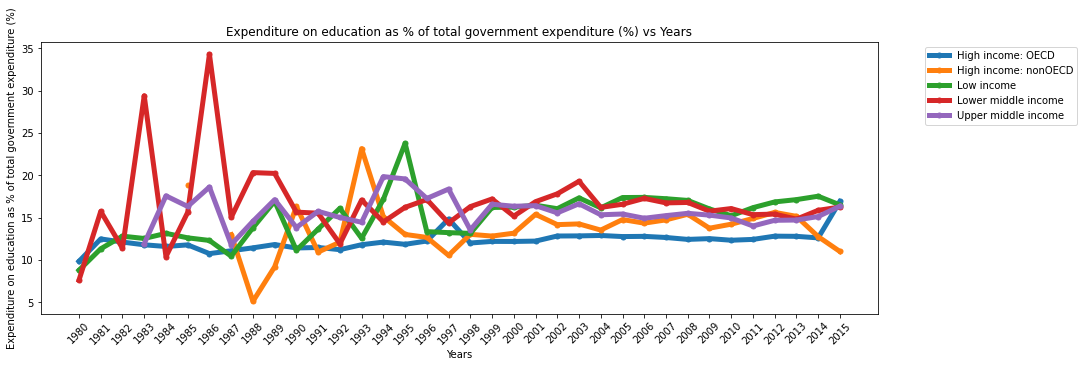

In [ ]:

income_group_plot('Expenditure on education as % of total government expenditure (%)','Expenditure on education as % of total government expenditure (%)',1980)

**We see a steady trend of the percentage of expenditures on education by different income group countries starting 2000. The lower and medium income group countries tend to invest more on education sector compared to the high income countries.**


**Expenditure on primary as % of government expenditure on education (%) over years from 1980 to 2015 for different income group countries**

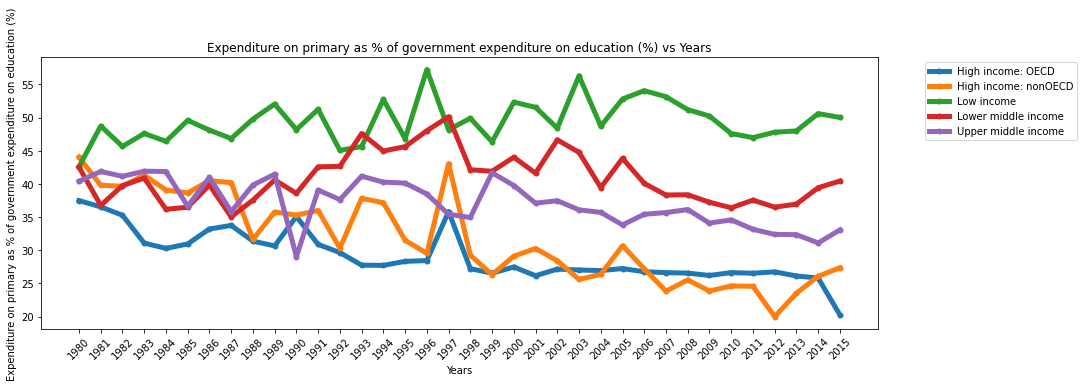

In [ ]:
# Expenditure on primary as % of government expenditure on education (%)
income_group_plot('Expenditure on primary as % of government expenditure on education (%)','Expenditure on primary as % of government expenditure on education (%)',1980)

**The lower income group countries especially use a higher share of expenditures on education for primary sector to ensure basic education to poorer classes of the country.**



**Expenditure on secondary as % of government expenditure on education (%) from years 1980 to 2015 for different income group countries**

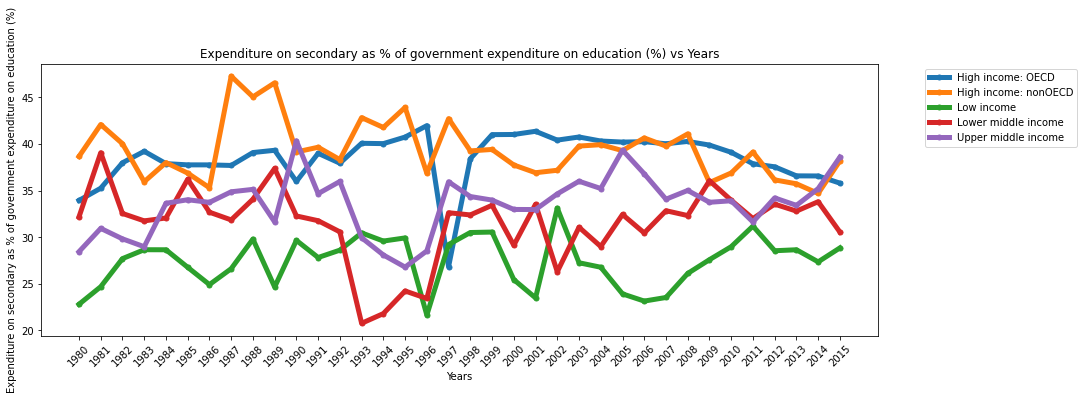

In [ ]:

income_group_plot('Expenditure on secondary as % of government expenditure on education (%)','Expenditure on secondary as % of government expenditure on education (%)',1980)

**The focus on secondary education is lesser from low income countries  compared to upper middle and high income countries.**



**Expenditure on tertiary as % of government expenditure on education (%) from 1980 to 2015 for different countries**

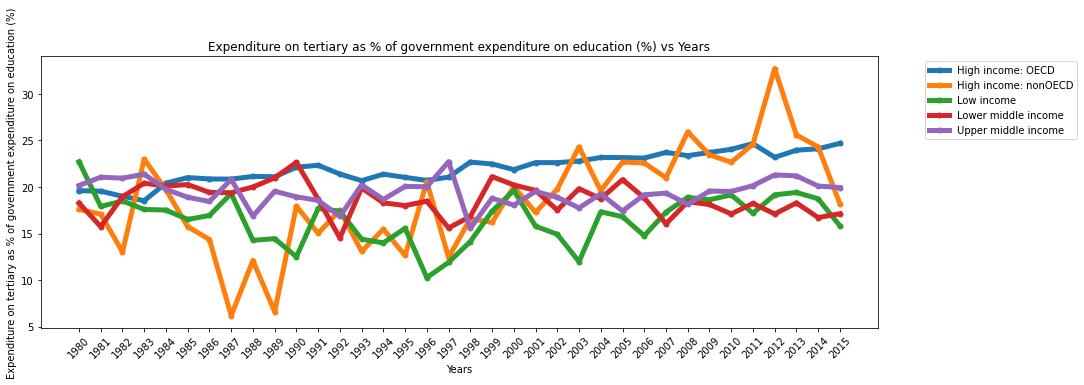

In [ ]:
income_group_plot('Expenditure on tertiary as % of government expenditure on education (%)','Expenditure on tertiary as % of government expenditure on education (%)',1980)

**While high income countries in OECD group have a higher share of expenditures devoted to tertiary education for all years, the high income countries in non-OECD have learnt to increase their share towards tertiary education over the years. The lower income countries continue to give lesser focus on tertiary education.**

**The population growth rate (annual%) for different Income groups over the years**

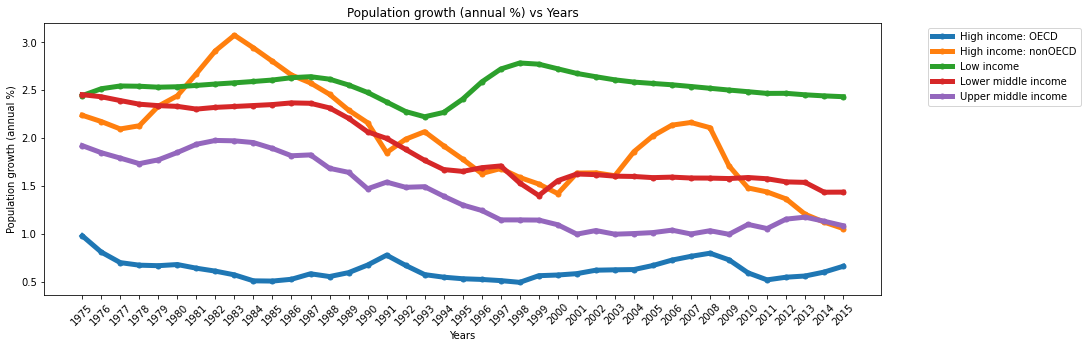

In [ ]:
#'Population growth (annual %)'
income_group_plot('Population growth (annual %)','Population growth (annual %)',1975)

**The lower income group countries have the maximum population growth whereas the high-income OECD countries have the minimum population growth. The High income non OECD and the middle income groups have actually decreased the population growth rate.**


**Internet users (per 100 people) for different Income groups over the years**

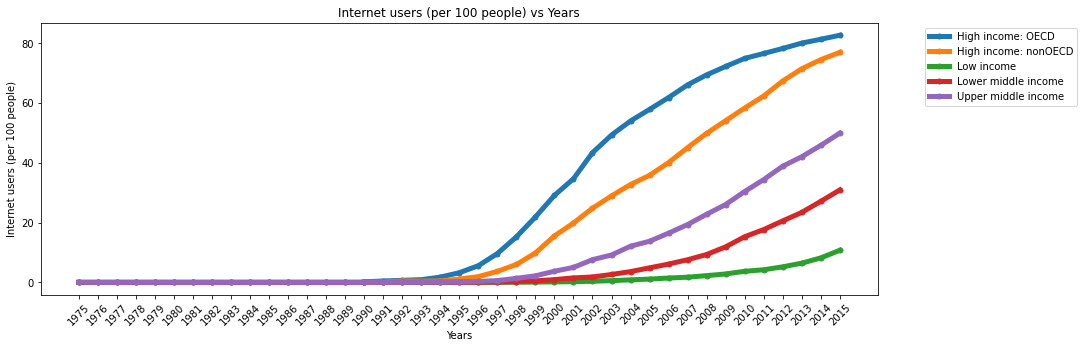

In [ ]:
# 'Internet users (per 100 people)'
income_group_plot('Internet users (per 100 people)','Internet users (per 100 people)',1975)

**Internet users per 100 people is more for the countries that are more economically sound and it is increasing over the years**


In [ ]:
enrolment_indicator = ['Adjusted net enrolment rate, primary, both sexes (%)','Adjusted net enrolment rate, lower secondary, both sexes (%)','Adjusted net enrolment rate, upper secondary, both sexes (%)']

**Variation of Adjusted net enrolment rate, primary, both sexes (%) over years for different income group countries**

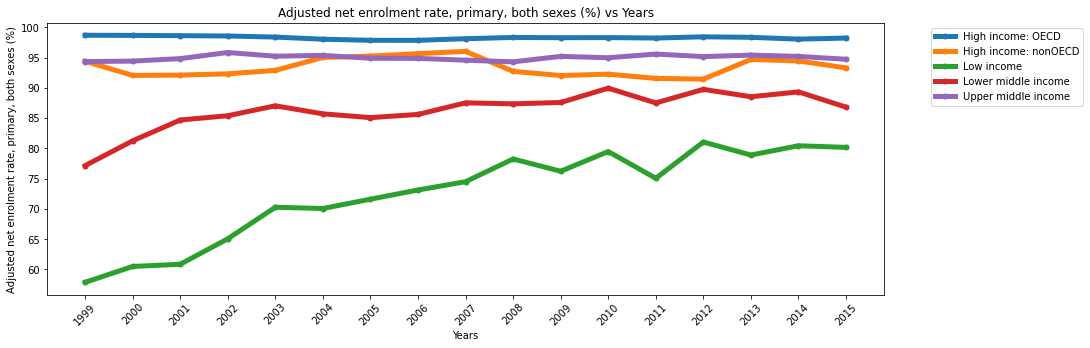

In [ ]:
income_group_plot(enrolment_indicator[0],enrolment_indicator[0],1970)

**Enrolment in low income group countries has been increasing since 1999 and it's a good sign towards the economic development.**

**Variation of Adjusted net enrolment rate, lower secondary, both sexes (%) over years for different income group countries**

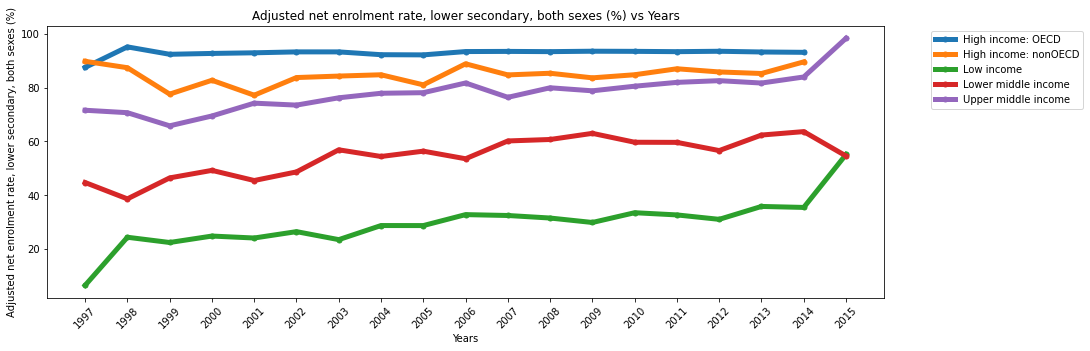

In [ ]:
income_group_plot(enrolment_indicator[1],enrolment_indicator[1],1997)

**Net enrolment rate is low for lower secondary in low income group countries when compared to other income group countries.**

**The drop rate may be high from primary to lower secondary in low income group countries.**

**Variation of Adjusted net enrolment rate, higher secondary, both sexes (%) over years for different income group countries**

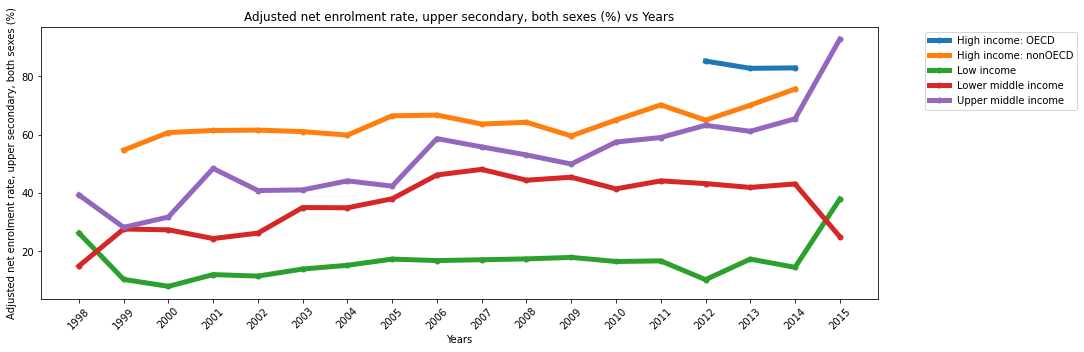

In [ ]:
income_group_plot(enrolment_indicator[2],enrolment_indicator[2],1970)

**Net enrolment rate is very low for higher secondary level in low income group countries when compared to other income group countries.**


**Literacy rates for different groups vs years**

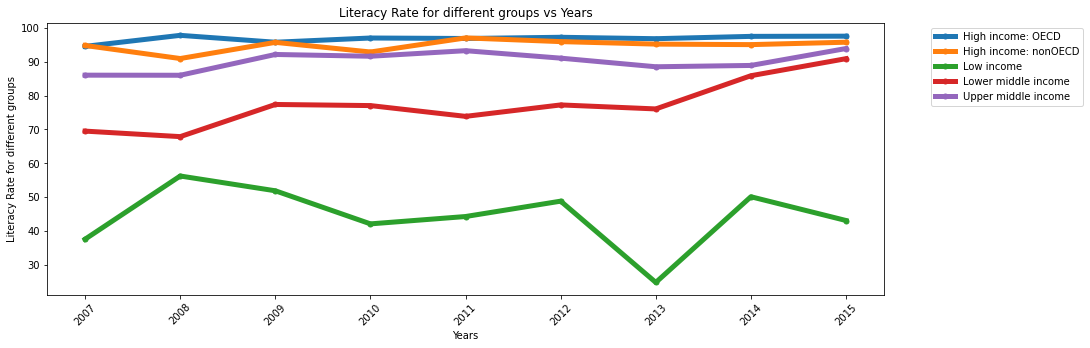

In [ ]:
 income_group_plot('Adult literacy rate, population 15+ years, female (%)','Literacy Rate for different groups',2007)

**Literacy rate for adult(female) is quite low for low income group but it's stil going down which serious**


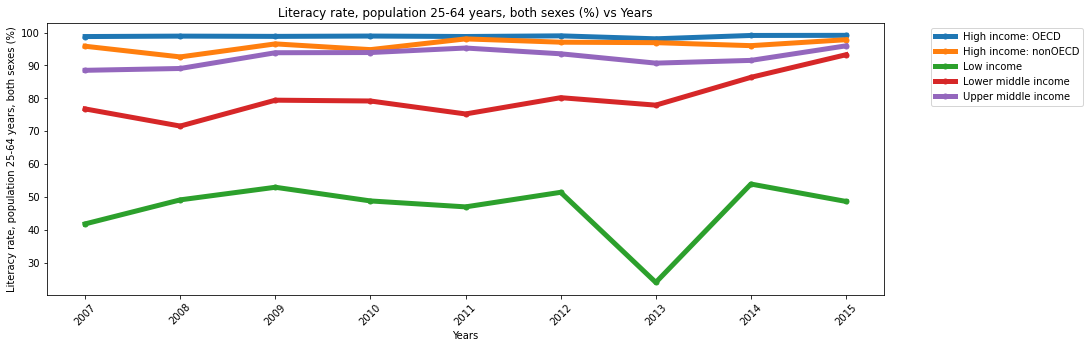

In [ ]:
income_group_plot('Literacy rate, population 25-64 years, both sexes (%)','Literacy rate, population 25-64 years, both sexes (%)',2007)

**Literacy rate for age group 25-64 is quite low for low income group but it's stil going down which serious**

**Variation of Youth literacy rate, population 15-24 years**

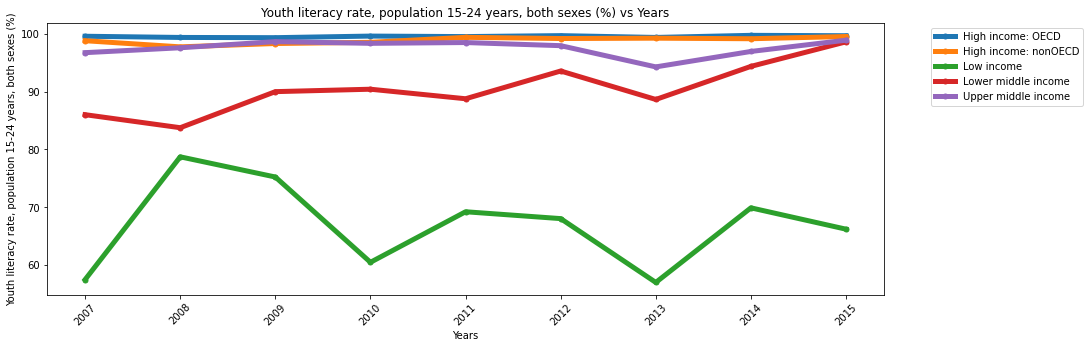

In [ ]:
income_group_plot('Youth literacy rate, population 15-24 years, both sexes (%)','Youth literacy rate, population 15-24 years, both sexes (%)',2007)

**Variation of Elderly literacy rate, population 65+ years, both sexes (%)**

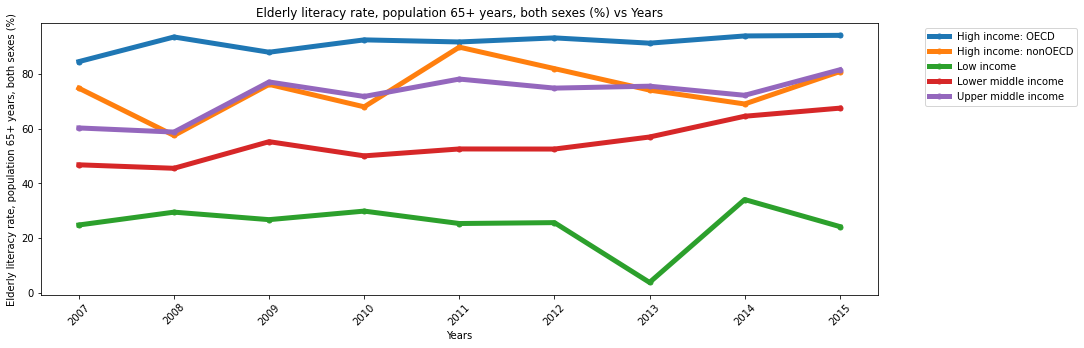

In [ ]:
income_group_plot('Elderly literacy rate, population 65+ years, both sexes (%)','Elderly literacy rate, population 65+ years, both sexes (%)',2007)

**Unemployment, male (% of male labor force)**

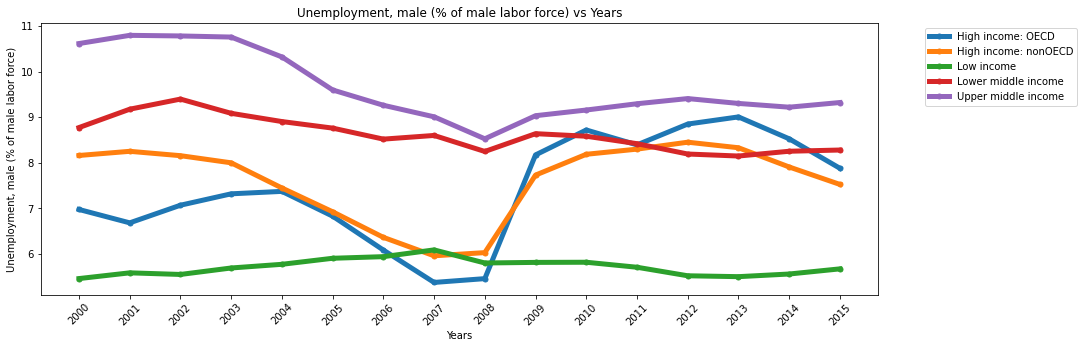

In [ ]:
income_group_plot('Unemployment, male (% of male labor force)','Unemployment, male (% of male labor force)',2000)

**Unemployment, female (% of female labor force)**

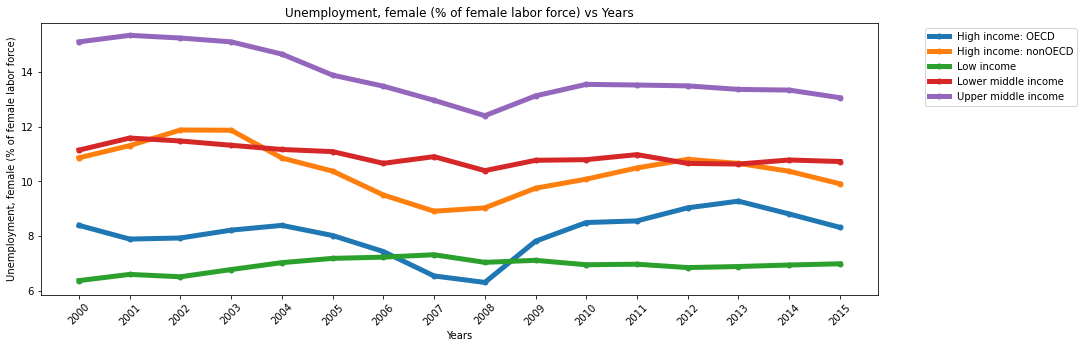

In [ ]:
income_group_plot('Unemployment, female (% of female labor force)','Unemployment, female (% of female labor force)',2000)

### **Analysis of Population growth trend in different countries and how is it affecting the literacy levels and education scenario**

In [ ]:
#merging df_StatsSeries and df_StatsData on Indicator Name with inner join
merged_statseries_statdata=pd.merge(df_StatsSeries,df_StatsData, on='Indicator Name',how='inner')

In [ ]:
#merging the previously merged dataframe and df_StatsCountry with respect to Country code
merged_series_Data_country=pd.merge(merged_statseries_statdata,df_StatsCountry, on ='Country Code', how= 'inner')
#Data frame for lower income group
df_lowerincome=merged_series_Data_country.loc[merged_series_Data_country['Income Group']=='Low income',:]
#created a list of some country names which we are already familiar to make our analysis easy
countrylist1=['Afghanistan', 'Bangladesh','Nepal','Zimbabwe','Myanmar']

In [ ]:
#creating a function that will take a dataframe and list of countries and will return a dataframe with required columns and rows
def newdf(anydf,countrylst):
  anydf=anydf.loc[anydf['Country Name'].isin(countrylst),:]
  anydf_df_Population=anydf.loc[anydf['Topic']=='Health: Population: Dynamics',:]
  anydf_df_Population=anydf_df_Population[['Country Name', '2005', '2006','2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014']]
  anydf_df_Population.set_index(anydf_df_Population['Country Name'], drop=True, append=False, inplace=True, verify_integrity=False)
  anydf_df_Population.drop('Country Name',axis=1,inplace=True)
  anydf_df_Population=anydf_df_Population.ffill(axis=1)
  anydf_df_Population=anydf_df_Population.transpose()
  return anydf_df_Population


In [ ]:
lowincomeDf=newdf(df_lowerincome,countrylist1)

Text(0.5, 0, 'Years')

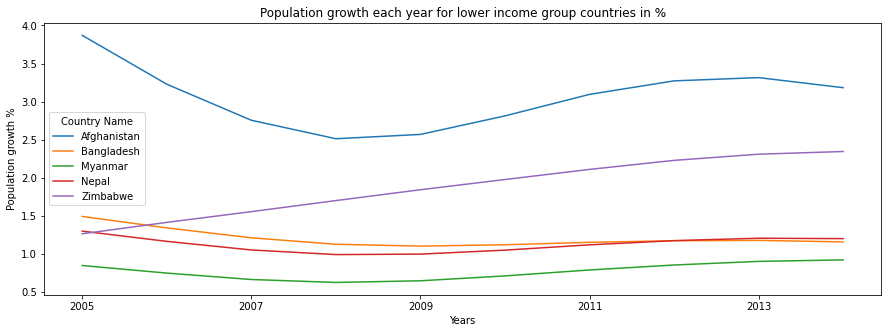

In [ ]:
lowincomeDf.plot()

plt.title('Population growth each year for lower income group countries in %')
plt.ylabel('Population growth %')
plt.xlabel('Years')

In [ ]:
#dataframe for higher non OECD Income group(OECD means Organisation for Economic Co-operation and Development)
df_highincome_nonOecd=merged_series_Data_country.loc[merged_series_Data_country['Income Group']=='High income: nonOECD',:]

In [ ]:
countrylist2=['Saudi Arabia', 'Singapore','United Arab Emirates','Kuwait','Oman']

In [ ]:
NonoecdDf=newdf(df_highincome_nonOecd,countrylist2)

Text(0.5, 0, 'Years')

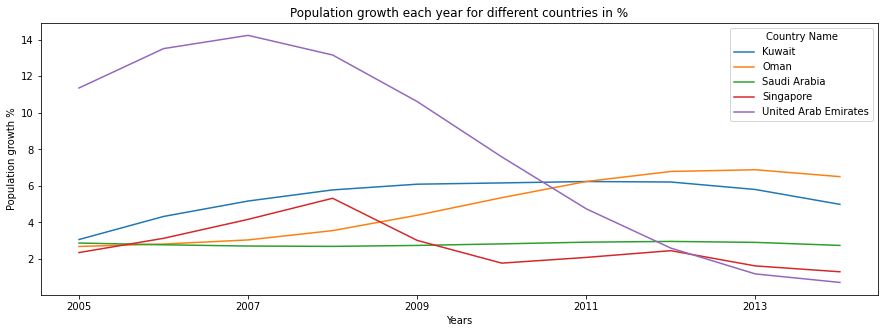

In [ ]:
NonoecdDf.plot()

plt.title('Population growth each year for different countries in %')
plt.ylabel('Population growth %')
plt.xlabel('Years')

In [ ]:
#dataframe for higher income group OECD
df_highincome_Oecd=merged_series_Data_country.loc[merged_series_Data_country['Income Group']=='High income: OECD',:]

Text(0.5, 0, 'Years')

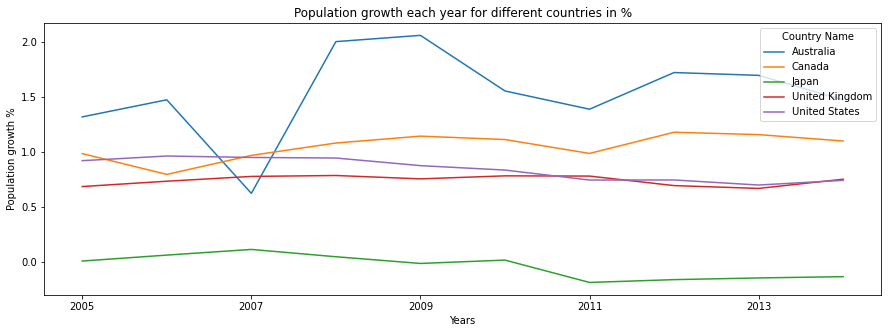

In [ ]:
countrylist3=['Australia','Canada','Japan','United Kingdom','United States']
#calling the fuction that will return the required rows and columns
oecdDf=newdf(df_highincome_Oecd,countrylist3)
oecdDf.plot()

plt.title('Population growth each year for different countries in %')
plt.ylabel('Population growth %')
plt.xlabel('Years')

Text(0.5, 0, 'Years')

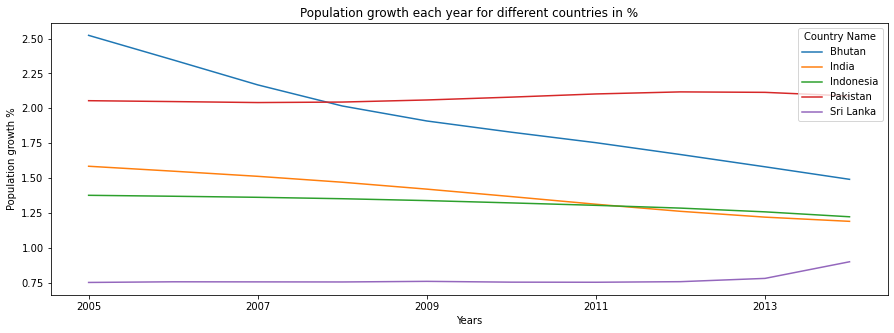

In [ ]:
#dataframe for Lower middle Income group
df_lowermiddle=merged_series_Data_country.loc[merged_series_Data_country['Income Group']=='Lower middle income']
countrylist4=['India','Sri Lanka','Pakistan','Bhutan','Indonesia']
#calling function newdf to return a new dataframe with selected rows and columns
lowermidDf=newdf(df_lowermiddle,countrylist4)
lowermidDf.plot()

plt.title('Population growth each year for different countries in %')
plt.ylabel('Population growth %')
plt.xlabel('Years')

Text(0.5, 0, 'Years')

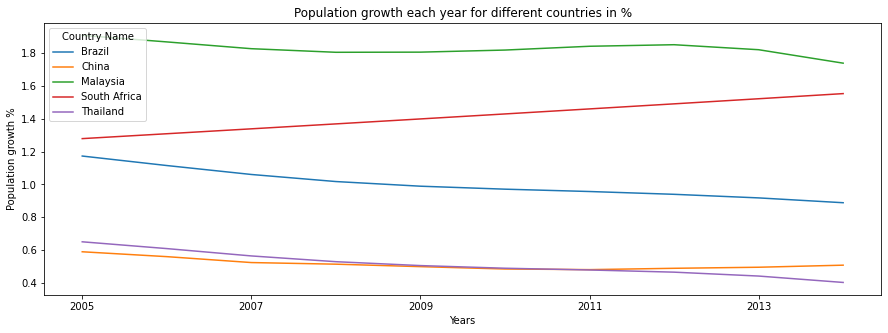

In [ ]:
#dataframe for upper middle income group
df_uppermiddle=merged_series_Data_country.loc[merged_series_Data_country['Income Group']=='Upper middle income']
countrylist5=['China','Brazil','South Africa','Thailand','Malaysia']
uppermidDf=newdf(df_uppermiddle,countrylist5)
uppermidDf.plot()

plt.title('Population growth each year for different countries in %')
plt.ylabel('Population growth %')
plt.xlabel('Years')

In [ ]:
#creating a function that will take a dataframe a list of countries and return dataframe that has indicator code IT.NET.USER.P2
def newdfInfra(anydf,countrylst):
  anydf=anydf.loc[anydf['Country Name'].isin(countrylst),:]
  anydf_df_Infra=anydf.loc[anydf['Topic']=='Infrastructure: Communications',:]
  anydf_df_Infra=anydf_df_Infra.loc[anydf_df_Infra['Indicator Code']=='IT.NET.USER.P2',:]
  anydf_df_Infra=anydf_df_Infra[['Country Name', '2005', '2006','2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014']]
  anydf_df_Infra.set_index(anydf_df_Infra['Country Name'], drop=True, append=False, inplace=True, verify_integrity=False)
  anydf_df_Infra.drop('Country Name',axis=1,inplace=True)
  anydf_df_Infra=anydf_df_Infra.ffill(axis=1)
  anydf_df_Infra=anydf_df_Infra.transpose()
  return anydf_df_Infra


Text(0.5, 0, 'Years')

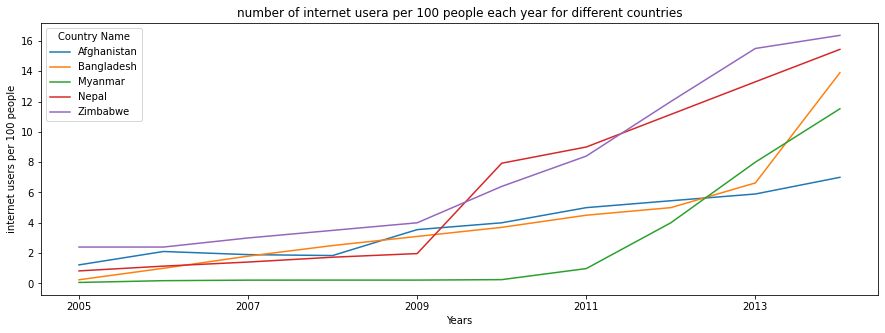

In [ ]:
#Infra for lower income groups
lowerincomeInfraDf=newdfInfra(df_lowerincome,countrylist1)
lowerincomeInfraDf.plot()
plt.title('number of internet usera per 100 people each year for different countries')
plt.ylabel('internet users per 100 people')
plt.xlabel('Years')

Text(0.5, 0, 'Years')

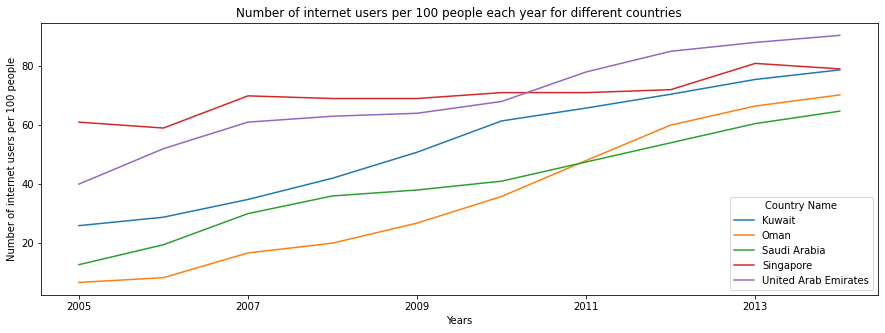

In [ ]:
#Infra for Non OECD high income group
NonoecdDfInfra=newdfInfra(df_highincome_nonOecd,countrylist2)
NonoecdDfInfra.plot()

plt.title('Number of internet users per 100 people each year for different countries')
plt.ylabel('Number of internet users per 100 people')
plt.xlabel('Years')

Text(0.5, 0, 'Years')

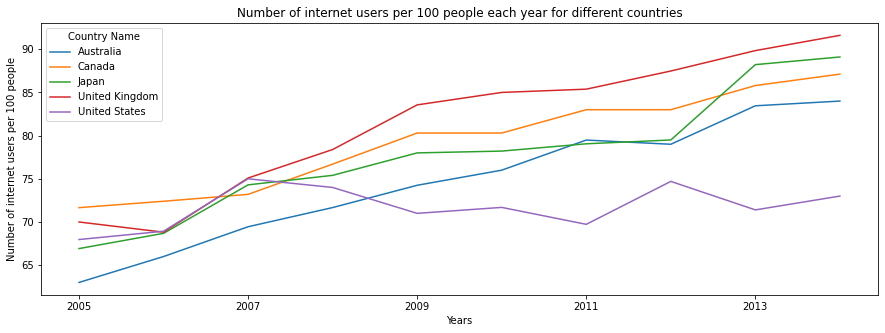

In [ ]:
#Infra for OECD high income group
oecdDfInfra=newdfInfra(df_highincome_Oecd,countrylist3)
oecdDfInfra.plot()

plt.title('Number of internet users per 100 people each year for different countries')
plt.ylabel('Number of internet users per 100 people')
plt.xlabel('Years')

Text(0.5, 0, 'Years')

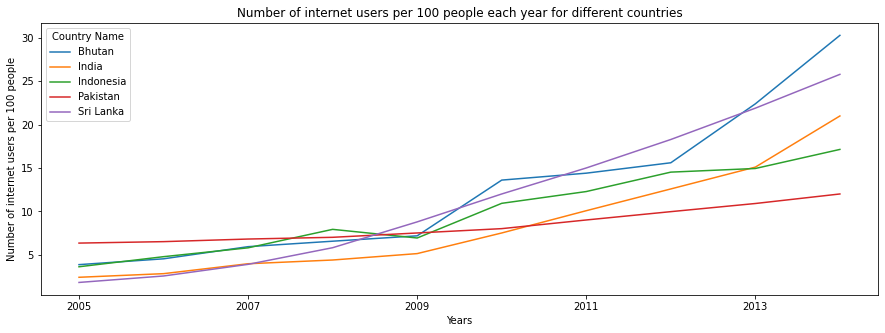

In [ ]:
lowermidDfInfra=newdfInfra(df_lowermiddle,countrylist4)
lowermidDfInfra.plot()

plt.title('Number of internet users per 100 people each year for different countries')
plt.ylabel('Number of internet users per 100 people')
plt.xlabel('Years')

Text(0.5, 0, 'Years')

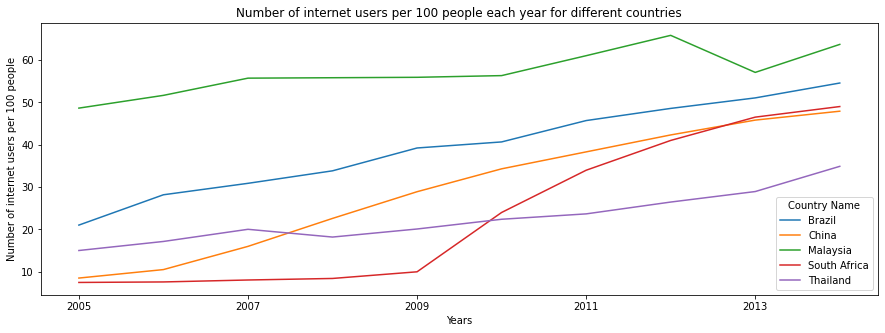

In [ ]:
uppermidDfInfra=newdfInfra(df_uppermiddle,countrylist5)
uppermidDfInfra.plot()

plt.title('Number of internet users per 100 people each year for different countries')
plt.ylabel('Number of internet users per 100 people')
plt.xlabel('Years')

Text(0.5, 0, 'Years')

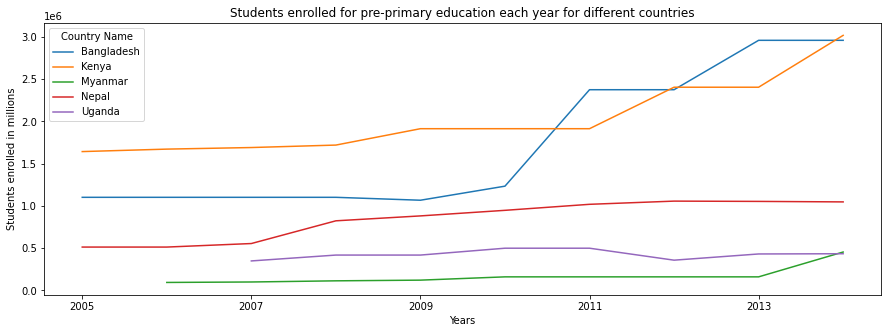

In [ ]:
countrylist1=['Uganda', 'Bangladesh','Nepal','Kenya','Myanmar']
lowerincomeECEDf=newdfECE(df_lowerincome,countrylist1)
lowerincomeECEDf.plot()

plt.title('Students enrolled for pre-primary education each year for different countries')
plt.ylabel('Students enrolled in millions')
plt.xlabel('Years')

In [ ]:
def newdfECE(anydf,countrylst):
  anydf=anydf.loc[anydf['Country Name'].isin(countrylst),:]
  anydf_df_ECE=anydf.loc[anydf['Topic']=='Early Childhood Education',:]
  anydf_df_ECE=anydf_df_ECE.loc[anydf_df_ECE['Indicator Code']=='SE.PRE.ENRL',:]
  anydf_df_ECE=anydf_df_ECE[['Country Name', '2005', '2006','2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014']]
  anydf_df_ECE.set_index(anydf_df_ECE['Country Name'], drop=True, append=False, inplace=True, verify_integrity=False)
  anydf_df_ECE.drop('Country Name',axis=1,inplace=True)
  anydf_df_ECE=anydf_df_ECE.ffill(axis=1)
  anydf_df_ECE=anydf_df_ECE.transpose()
  return anydf_df_ECE


Text(0.5, 0, 'Years')

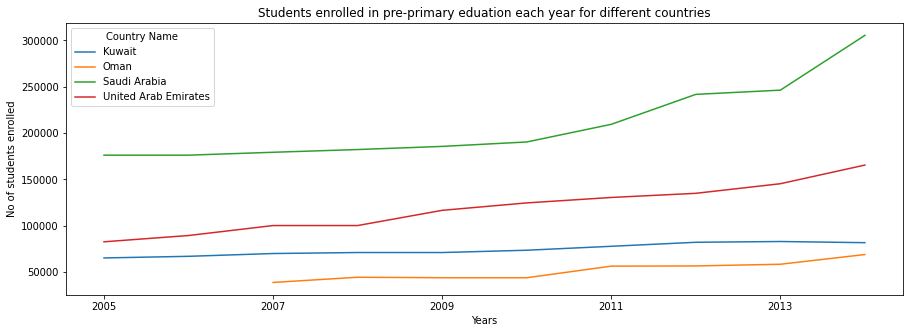

In [ ]:
countrylist2=['Saudi Arabia','United Arab Emirates','Kuwait','Oman']
nonoecdDfECE=newdfECE(df_highincome_nonOecd,countrylist2)
nonoecdDfECE.plot()

plt.title('Students enrolled in pre-primary eduation each year for different countries')
plt.ylabel('No of students enrolled')
plt.xlabel('Years')

Text(0.5, 0, 'Years')

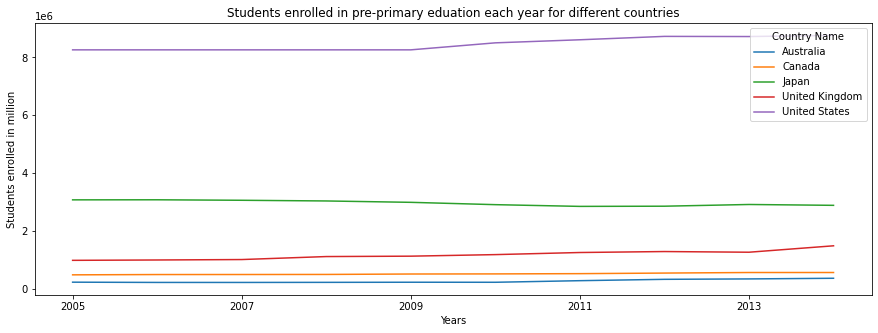

In [ ]:
oecdDfECE=newdfECE(df_highincome_Oecd,countrylist3)
oecdDfECE.plot()

plt.title('Students enrolled in pre-primary eduation each year for different countries')
plt.ylabel('Students enrolled in million')
plt.xlabel('Years')

Text(0.5, 0, 'Years')

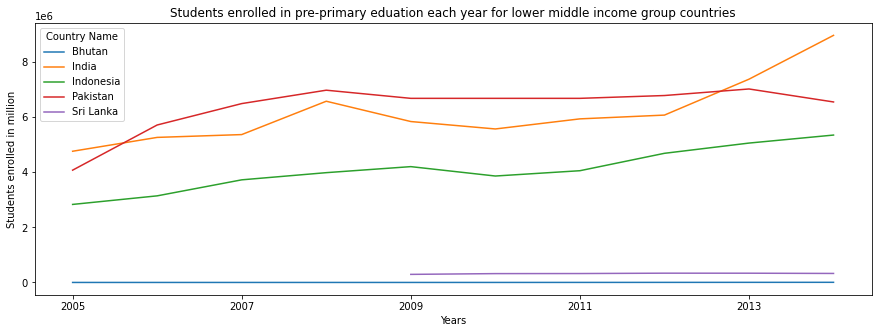

In [ ]:
lowermidDfECE=newdfECE(df_lowermiddle,countrylist4)
lowermidDfECE.plot()

plt.title('Students enrolled in pre-primary eduation each year for lower middle income group countries')
plt.ylabel('Students enrolled in million')
plt.xlabel('Years')

## **Variation of Net enrolment rate for various income group countries over years**

In [ ]:
cols_required = np.concatenate((np.array(df_StatsData.columns[:4]),np.array(df_StatsData.loc[:,"2000":"2015"].columns)))

In [ ]:
new_stats_data = df_StatsData.loc[~df_StatsData.loc[:,"2000":"2015"].isna().all(axis=1),cols_required]

In [ ]:
new_stats_data[cols_required[4:]] = new_stats_data[cols_required[4:]].ffill(axis=1)

In [ ]:
new_stats_data[cols_required[4:]] = new_stats_data[cols_required[4:]].bfill(axis=1)

In [ ]:
df_lowerincome.head()

,Series Code,Topic,Indicator Name,Long definition,Country Name,Country Code,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69,Short Name,Income Group
80075,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Afghanistan,AFG,BAR.NOED.1519.FE.ZS,91.44,NaN,NaN,NaN,NaN,88.81,NaN,NaN,NaN,NaN,87.50,NaN,NaN,NaN,NaN,85.50,NaN,NaN,NaN,NaN,84.20,NaN,NaN,NaN,NaN,82.35,NaN,NaN,NaN,NaN,69.52,NaN,NaN,NaN,NaN,82.68,NaN,NaN,NaN,NaN,59.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan,Low income
80076,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Afghanistan,AFG,BAR.NOED.1519.ZS,77.08,NaN,NaN,NaN,NaN,72.24,NaN,NaN,NaN,NaN,68.20,NaN,NaN,NaN,NaN,62.18,NaN,NaN,NaN,NaN,67.98,NaN,NaN,NaN,NaN,69.11,NaN,NaN,NaN,NaN,49.12,NaN,NaN,NaN,NaN,61.01,NaN,NaN,NaN,NaN,37.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan,Low income
80077,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Afghanistan,AFG,BAR.NOED.15UP.FE.ZS,97.21,NaN,NaN,NaN,NaN,96.14,NaN,NaN,NaN,NaN,94.59,NaN,NaN,NaN,NaN,92.84,NaN,NaN,NaN,NaN,91.02,NaN,NaN,NaN,NaN,89.25,NaN,NaN,NaN,NaN,85.29,NaN,NaN,NaN,NaN,84.43,NaN,NaN,NaN,NaN,78.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan,Low income
80078,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Afghanistan,AFG,BAR.NOED.15UP.ZS,88.81,NaN,NaN,NaN,NaN,85.74,NaN,NaN,NaN,NaN,82.03,NaN,NaN,NaN,NaN,77.80,NaN,NaN,NaN,NaN,75.04,NaN,NaN,NaN,NaN,73.21,NaN,NaN,NaN,NaN,67.85,NaN,NaN,NaN,NaN,65.73,NaN,NaN,NaN,NaN,58.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan,Low income
80079,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Afghanistan,AFG,BAR.NOED.2024.FE.ZS,94.80,NaN,NaN,NaN,NaN,94.80,NaN,NaN,NaN,NaN,89.50,NaN,NaN,NaN,NaN,88.19,NaN,NaN,NaN,NaN,85.39,NaN,NaN,NaN,NaN,84.89,NaN,NaN,NaN,NaN,83.03,NaN,NaN,NaN,NaN,69.62,NaN,NaN,NaN,NaN,77.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan,Low income


In [ ]:
def get_GDP(df):
  '''
    This function takes a dataframe and returns GDP of a particular country
  '''
  val = new_stats_data.loc[(new_stats_data['Indicator Code'] == 'NY.GDP.PCAP.CD') & (new_stats_data['Country Name'] == df['Short Name']),'2010' ].values
  try:
    return val[0]
  except:
    return np.nan


In [ ]:
cols_required

array(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'],
      dtype=object)

### **Analysis of Low Income group countries**

In [ ]:
low_income_df = df_StatsCountry[df_StatsCountry['Income Group']=='Low income']

In [ ]:
low_income_df['GDP_percapita'] = low_income_df.apply(get_GDP,axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
low_income_df = low_income_df.dropna(subset=['GDP_percapita'])

In [ ]:
low_income_df = low_income_df.sort_values(by='GDP_percapita') 

In [ ]:
top5_low = low_income_df['Short Name'][:4].values

In [ ]:
low_stats_df = new_stats_data.loc[new_stats_data['Country Name'].isin(top5_low)]

In [ ]:
measure = "Adjusted net enrolment rate, "
school_level = ['primary', 'lower secondary', 'upper secondary']
gender = ['both sexes (%)', 'female (%)', 'gender parity index (GPI)', 'male (%)']

In [ ]:
indicator1 = measure + school_level[0] + ', ' + gender[0]
low_df1 = low_stats_df[low_stats_df['Indicator Name']==indicator1]

In [ ]:
def plot_indicator(indicator,df):
  '''
    This function takes indicator, dataframe as input and returns a plot for that indicator
  '''
  plt.figure(figsize=[15,5])
  plt.plot(df.loc[:,'2000':'2015'].T)
  plt.legend(df.loc[:,'Country Name'].values)
  plt.xlabel('Years')
  plt.ylabel(indicator)
  plt.title('Variation of '+ indicator + 'in Low Income countries')


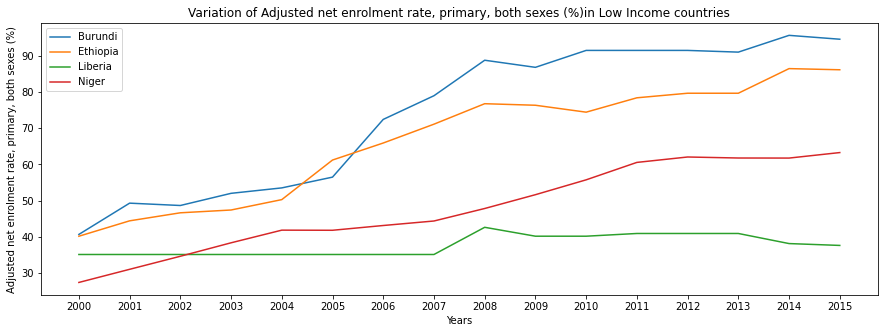

In [ ]:
plot_indicator(indicator1,low_df1)

In [ ]:
indicator_M = measure + school_level[0] + ', ' + gender[3]
low_male_df = low_stats_df[low_stats_df['Indicator Name']==indicator_M]

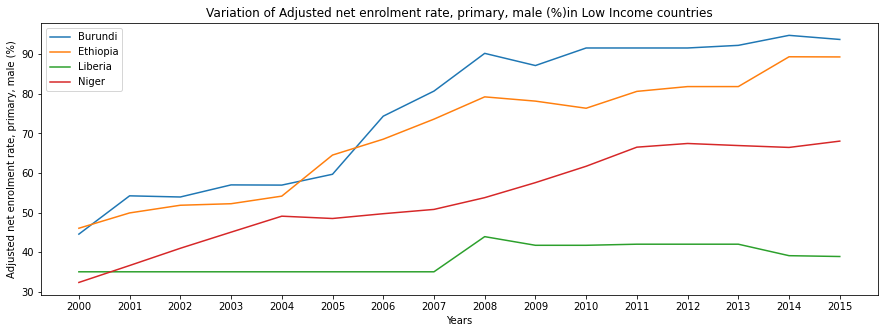

In [ ]:
plot_indicator(indicator_M,low_male_df)

In [ ]:
indicator_F = measure + school_level[0] + ', ' + gender[1]
low_female_df = low_stats_df[low_stats_df['Indicator Name']==indicator_F]

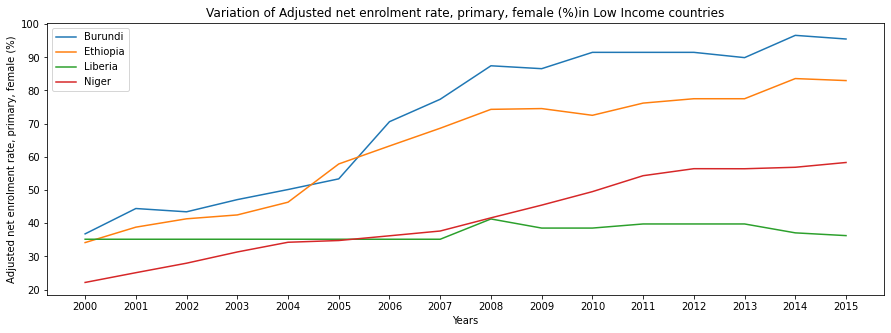

In [ ]:
plot_indicator(indicator_F,low_female_df)

In [ ]:
low_complete_stats_df = new_stats_data.loc[new_stats_data['Country Name'].isin(low_income_df['Short Name'].values)]

In [ ]:
low_complete_stats_df

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
91625,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,28.059870,28.059870,28.059870,28.059870,28.059870,28.059870,28.059870,28.059870,28.059870,28.059870,28.059870,28.059870,28.059870,47.436790,50.627232,50.627232
91626,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,15.223100,15.223100,15.223100,15.223100,15.223100,15.223100,15.223100,15.223100,15.223100,15.223100,15.223100,15.223100,15.223100,34.073261,37.641541,37.641541
91627,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,0.379130,0.379130,0.379130,0.379130,0.379130,0.379130,0.379130,0.379130,0.379130,0.379130,0.379130,0.379130,0.379130,0.567060,0.598370,0.598370
91628,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,40.152851,40.152851,40.152851,40.152851,40.152851,40.152851,40.152851,40.152851,40.152851,40.152851,40.152851,40.152851,40.152851,60.087059,62.906952,62.906952
91633,Afghanistan,AFG,"Adjusted net enrolment rate, upper secondary, ...",UIS.NERA.3,31.332621,31.332621,31.332621,31.332621,31.332621,31.332621,31.332621,31.332621,31.332621,31.332621,31.332621,31.332621,31.332621,31.332621,32.417030,32.417030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,166679.000000,166679.000000,166679.000000,166679.000000,166679.000000,166679.000000,166679.000000,166679.000000,166679.000000,166679.000000,166679.000000,166679.000000,166679.000000,166679.000000,199464.000000,199464.000000
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,90.930700,90.930700,90.930700,90.930700,90.930700,90.930700,90.930700,90.930700,90.930700,90.930700,90.930700,90.930700,90.930700,90.930700,90.428120,90.428120
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,92.124560,92.124560,92.124560,92.124560,92.124560,92.124560,92.124560,92.124560,92.124560,92.124560,92.124560,92.124560,92.124560,92.124560,93.188350,93.188350
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,1.028280,1.028280,1.028280,1.028280,1.028280,1.028280,1.028280,1.028280,1.028280,1.028280,1.028280,1.028280,1.028280,1.028280,1.063890,1.063890


In [ ]:
def get_correlation_coeff(ind):
  '''
    This function takes indicator as input and returns the correlation coefficient
  '''
  indicator_M = measure + school_level[ind] + ', ' + gender[3]
  indicator_F = measure + school_level[ind] + ', ' + gender[1]
  low_complete_stats_df_male = low_complete_stats_df[low_complete_stats_df['Indicator Name']==indicator_M]
  low_complete_stats_df_female = low_complete_stats_df[low_complete_stats_df['Indicator Name']==indicator_F]
  low_complete_stats_df_female['Class_label'] = [1]*len(low_complete_stats_df_female) 
  low_complete_stats_df_male['Class_label'] = [0]*len(low_complete_stats_df_male)
  low_male_female_complete_df = pd.concat([low_complete_stats_df_female,low_complete_stats_df_male])
  corrcoef = np.corrcoef(np.mean(low_male_female_complete_df.loc[:,'2000':'2015'],axis=1).T.values,low_male_female_complete_df['Class_label'].values)[1,0]
  gender_df = pd.DataFrame()
  gender_df['Mean_percentages'] = np.mean(low_male_female_complete_df.loc[:,'2000':'2015'],axis=1).T.values
  gender_df['Class_labels'] = low_male_female_complete_df['Class_label'].values
  return corrcoef,gender_df

In [ ]:
primary_corrcoef,primary_gender_df = get_correlation_coeff(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
print(f'Correlation coefficient Correlation coefficient between net enrollment rate (primary school) and gender: {primary_corrcoef}')

Correlation coefficient Correlation coefficient between net enrollment rate (primary school) and gender: -0.14897975767830907


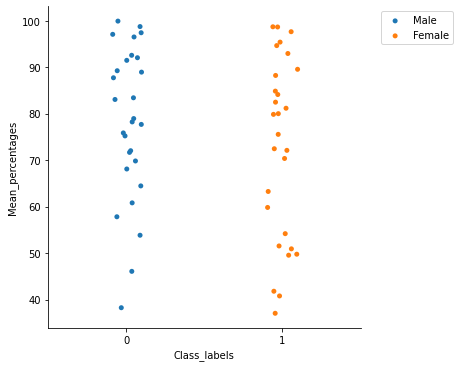

In [ ]:
import seaborn as sns
sns.catplot( data=primary_gender_df,y='Mean_percentages',x='Class_labels')
plt.legend(['Male','Female'],bbox_to_anchor=(1.05, 1), loc='upper left')

In [ ]:
highsec_corrcoef,highsec_gender_df = get_correlation_coeff(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
print(f'Correlation coefficient Correlation coefficient between net enrollment rate (primary school) and gender: {highsec_corrcoef}')

Correlation coefficient Correlation coefficient between net enrollment rate (primary school) and gender: -0.12028019415208761


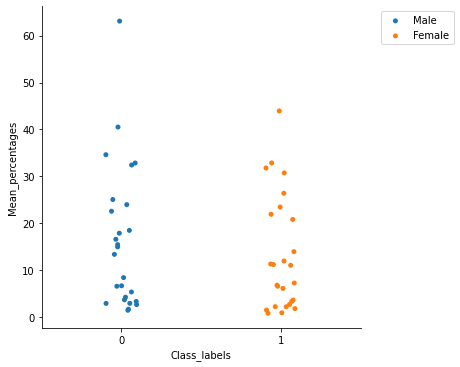

In [ ]:
sns.catplot( data=highsec_gender_df,y='Mean_percentages',x='Class_labels')
plt.legend(['Male','Female'],bbox_to_anchor=(1.05, 1), loc='upper left')

### **Analysis of High income group countries**

In [ ]:
high_income_nonoecd_df = df_StatsCountry[df_StatsCountry['Income Group']=='High income: nonOECD']

In [ ]:
high_income_oecd_df =  df_StatsCountry[df_StatsCountry['Income Group']=='High income: OECD']

In [ ]:
high_income_nonoecd_df['GDP_percapita'] = high_income_nonoecd_df.apply(get_GDP,axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
high_income_nonoecd_df = high_income_nonoecd_df.dropna(subset=['GDP_percapita'])

In [ ]:
high_income_nonoecd_df = high_income_nonoecd_df.sort_values(by='GDP_percapita',ascending=False)[:3]

In [ ]:
high_income_oecd_df['GDP_percapita'] = high_income_oecd_df.apply(get_GDP,axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
high_income_oecd_df = high_income_oecd_df.dropna(subset=['GDP_percapita'])

In [ ]:
high_income_oecd_df = high_income_oecd_df.sort_values(by='GDP_percapita',ascending=False)[:3]

In [ ]:
top6_high_df = pd.concat([high_income_oecd_df,high_income_nonoecd_df])

In [ ]:
top6_high_col = top6_high_df['Short Name'].values 

In [ ]:
high_stats_df = new_stats_data.loc[new_stats_data['Country Name'].isin(top6_high_col)]  

In [ ]:
high_df1 = high_stats_df[high_stats_df['Indicator Name']==indicator1]

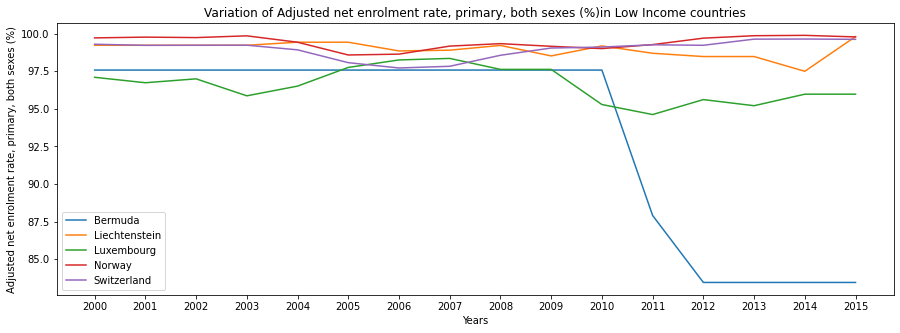

In [ ]:
plot_indicator(indicator1,high_df1)

In [ ]:
high_income_nonoecd =  df_StatsCountry[df_StatsCountry['Income Group']=='High income: nonOECD']
high_income_oecd =  df_StatsCountry[df_StatsCountry['Income Group']=='High income: OECD']

In [ ]:
cols_high_income = np.concatenate((high_income_oecd['Short Name'].values,high_income_nonoecd['Short Name'].values))

In [ ]:
high_complete_stats_df = new_stats_data.loc[new_stats_data['Country Name'].isin(cols_high_income)]

In [ ]:
def get_correlation_coeff_high(ind):
  '''
    This function takes indicator as input and returns correlation coefficient
  '''
  indicator_M = measure + school_level[ind] + ', ' + gender[3]
  indicator_F = measure + school_level[ind] + ', ' + gender[1]
  high_complete_stats_df_male = high_complete_stats_df[high_complete_stats_df['Indicator Name']==indicator_M]
  high_complete_stats_df_female = high_complete_stats_df[high_complete_stats_df['Indicator Name']==indicator_F]
  high_complete_stats_df_female['Class_label'] = [1]*len(high_complete_stats_df_female) 
  high_complete_stats_df_male['Class_label'] = [0]*len(high_complete_stats_df_male)
  high_male_female_complete_df = pd.concat([high_complete_stats_df_female,high_complete_stats_df_male])
  corrcoef = np.corrcoef(np.mean(high_male_female_complete_df.loc[:,'2000':'2015'],axis=1).T.values,high_male_female_complete_df['Class_label'].values)[1,0]
  gender_df = pd.DataFrame()
  gender_df['Mean_percentages'] = np.mean(high_male_female_complete_df.loc[:,'2000':'2015'],axis=1).T.values
  gender_df['Class_labels'] = high_male_female_complete_df['Class_label'].values
  return corrcoef,gender_df

In [ ]:
primary_corrcoef_highinc,primary_gender_df_highinc = get_correlation_coeff_high(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:

print(f'Correlation coefficient Correlation coefficient between net enrollment rate (primary school) and gender: {primary_corrcoef_highinc}')

Correlation coefficient Correlation coefficient between net enrollment rate (primary school) and gender: 0.030726319507041234


Text(3.799999999999997, 0.5, 'Distribution of Mean (%) of net enrolment rate')

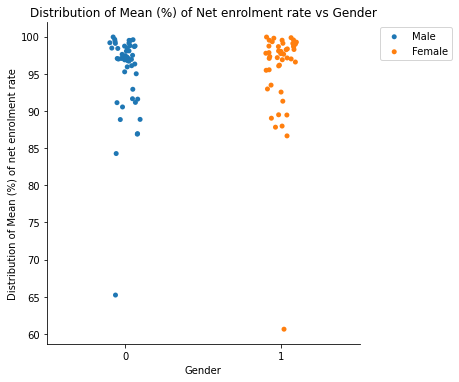

In [ ]:
sns.catplot( data=primary_gender_df_highinc,y='Mean_percentages',x='Class_labels')
plt.legend(['Male','Female'],bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Distribution of Mean (%) of Net enrolment rate vs Gender')
plt.xlabel('Gender')
plt.ylabel('Distribution of Mean (%) of net enrolment rate')

In [ ]:
higher_sec_corrcoef_highinc,higher_sec_gender_df_highinc = get_correlation_coeff(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
print(f'Correlation coefficient Correlation coefficient between net enrollment rate (primary school) and gender: {higher_sec_corrcoef_highinc}')

Correlation coefficient Correlation coefficient between net enrollment rate (primary school) and gender: -0.12028019415208761


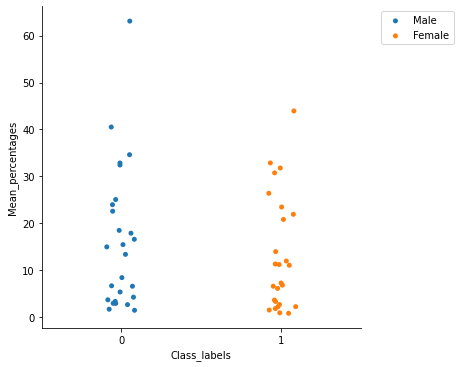

In [ ]:
sns.catplot( data=higher_sec_gender_df_highinc,y='Mean_percentages',x='Class_labels')
plt.legend(['Male','Female'],bbox_to_anchor=(1.05, 1), loc='upper left')

### **Analysis of Quality of education**

**PISA: Mean performance on the mathematics scale , reading scale and science scale indicators**

In [ ]:
sel_countries = ['Australia','Canada','China','United States','Vietnam','Peru','Jordan','New Zealand']

In [ ]:
cols_years = ['Country Name',	'Country Code',	'Indicator Name',	'Indicator Code','2009','2012','2015']

<Figure size 1080x720 with 0 Axes>

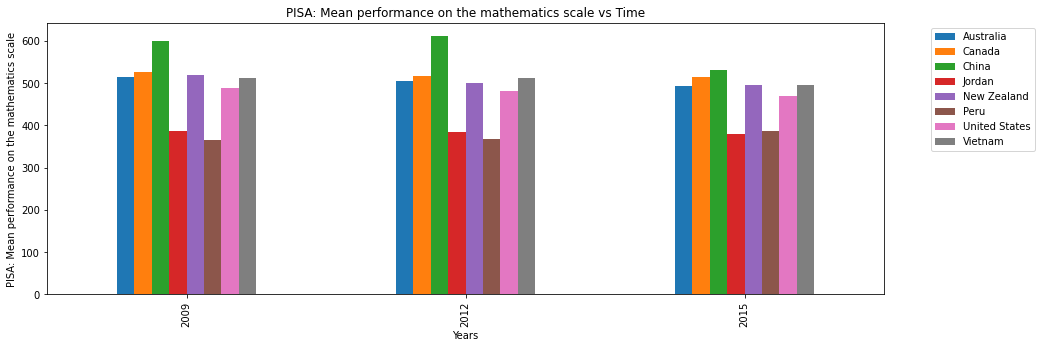

<Figure size 1080x720 with 0 Axes>

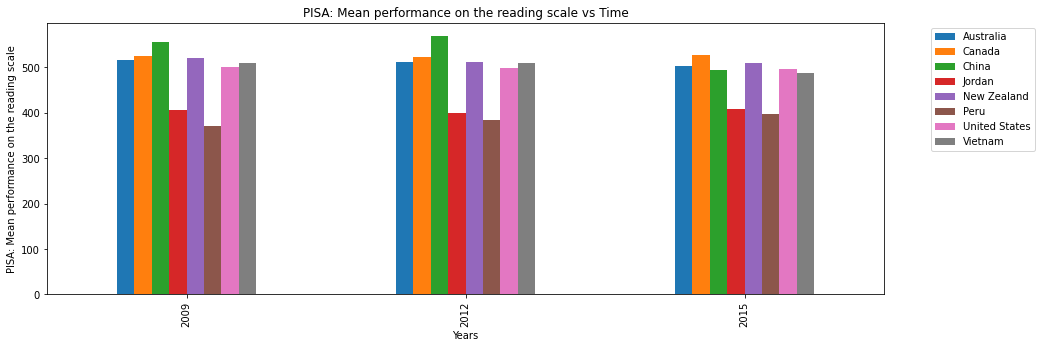

<Figure size 1080x720 with 0 Axes>

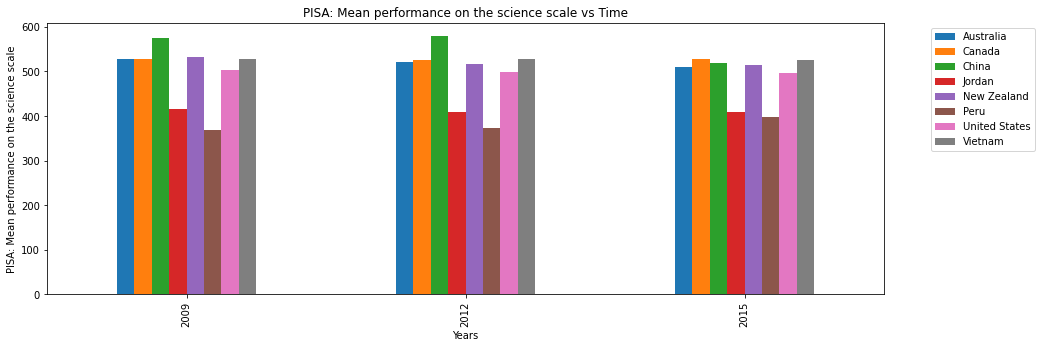

In [ ]:
pisa_ind = ['PISA: Mean performance on the mathematics scale','PISA: Mean performance on the reading scale','PISA: Mean performance on the science scale']
for pisa_indicator in pisa_ind:
   pisa_temp_df = new_stats_data[new_stats_data['Indicator Name']== pisa_indicator]
   pisa_temp_df1 = pisa_temp_df[pisa_temp_df['Country Name'].isin(sel_countries)]
   plt.figure(figsize=[15,10])
   pisa_temp_df1.loc[:,cols_years[-3:]].T.plot(kind='bar')
   plt.legend(pisa_temp_df1['Country Name'].values,bbox_to_anchor=(1.05, 1), loc='upper left')
   plt.xlabel('Years')
   plt.ylabel(pisa_indicator)
   plt.title(pisa_indicator + ' vs Time')

### **Analysis of Literacy Rate over various countries**

In [ ]:
country_series=df_countryseries.copy()

In [ ]:
country_series.head()

,CountryCode,SeriesCode,DESCRIPTION
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...


In [ ]:
country=df_StatsCountry.copy()

In [ ]:
country.head()

,Country Code,Short Name,Income Group
0,ABW,Aruba,High income: nonOECD
1,AFG,Afghanistan,Low income
2,AGO,Angola,Upper middle income
3,ALB,Albania,Upper middle income
4,AND,Andorra,High income: nonOECD


In [ ]:
stats_data=df_StatsData.copy()

In [ ]:
stats_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
footnote=df_StatsFootNote.copy()

In [ ]:
footnote.head()

,CountryCode,SeriesCode,Year
0,ABW,SE.PRE.ENRL.FE,YR2001
1,ABW,SE.TER.TCHR.FE,YR2005
2,ABW,SE.PRE.TCHR.FE,YR2000
3,ABW,SE.SEC.ENRL.GC,YR2004
4,ABW,SE.PRE.TCHR,YR2006


In [ ]:
stats_series=df_StatsSeries.copy()

In [ ]:
stats_series.head()

,Series Code,Topic,Indicator Name,Long definition
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...


#We are storing only the years data from 2005-2017 as after that all are projections

In [ ]:
required_columns=['Country Name','Country Code','Indicator Name','Indicator Code','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2014','2015','2016','2017']

In [ ]:
# We are updating our data with required columns only
stats_data=stats_data[required_columns]

In [ ]:
stats_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2014,2015,2016,2017
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,85.320152,NaN,NaN,NaN


First let's Classify countries based on their income group which is available in country table only

In [ ]:
# Let's create the list of countries for each income group
high_income_countries_list=list(country.loc[ (country['Income Group']=='High income: nonOECD')|(country['Income Group']=='High income: OECD'),['Short Name']].reset_index(drop=True)['Short Name'].unique())
low_income_coutries_list=list(country.loc[country['Income Group']=='Low income',['Short Name']]['Short Name'].unique())
upper_medium_income_countries_list=list(country.loc[ (country['Income Group']=='Upper middle income'),['Short Name']].reset_index(drop=True)['Short Name'].unique())
lower_medium_income_countries_list=list(country.loc[(country['Income Group']=='Lower middle income'),['Short Name']].reset_index(drop=True)['Short Name'].unique())

In [ ]:
print(high_income_countries_list)
print(lower_medium_income_countries_list)
print(upper_medium_income_countries_list)
print(lower_medium_income_countries_list)

['Aruba', 'Andorra', 'United Arab Emirates', 'Antigua and Barbuda', 'Australia', 'Austria', 'Belgium', 'Bahrain', 'The Bahamas', 'Bermuda', 'Barbados', 'Brunei', 'Canada', 'Switzerland', 'Channel Islands', 'Chile', 'Curaçao', 'Cayman Islands', 'Cyprus', 'Czech Republic', 'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France', 'Faeroe Islands', 'United Kingdom', 'Equatorial Guinea', 'Greece', 'Greenland', 'Guam', 'Hong Kong SAR, China', 'Croatia', 'Isle of Man', 'Ireland', 'Iceland', 'Israel', 'Italy', 'Japan', 'St. Kitts and Nevis', 'Korea', 'Kuwait', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Latvia', 'Macao SAR, China', 'St. Martin (French part)', 'Monaco', 'Malta', 'Northern Mariana Islands', 'New Caledonia', 'Netherlands', 'Norway', 'New Zealand', 'Oman', 'Poland', 'Puerto Rico', 'Portugal', 'French Polynesia', 'Qatar', 'Russia', 'Saudi Arabia', 'Singapore', 'San Marino', 'Slovak Republic', 'Slovenia', 'Sweden', 'Sint Maarten (Dutch part)', 'Turks and Caicos Islands', 'Tri

From the above list it could be seen most of high income group counteries belongs to Europe

Most of low income group countries are from Africa and South America

Many countries in medium income group are from Asia only

###**Starting analysing data from lower medium income group countries like India, Pakistan and Nigeria**

In [ ]:
# Lets make a dataframe for India
India=stats_data.loc[stats_data['Country Name']=='India'].reset_index(drop=True)

In [ ]:
# Make a table to store all literacy related data for india
india_literacy_table=India[India['Indicator Name'].str.contains('literacy', regex=False, case=False, na=False)].reset_index(drop=True)

In [ ]:
india_literacy_table.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2014,2015,2016,2017
0,India,IND,"Adult literacy rate, population 15+ years, bot...",SE.ADT.LITR.ZS,NaN,62.75447,NaN,NaN,NaN,NaN,69.30256,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,India,IND,"Adult literacy rate, population 15+ years, fem...",SE.ADT.LITR.FE.ZS,NaN,50.82376,NaN,NaN,NaN,NaN,59.27732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,India,IND,"Adult literacy rate, population 15+ years, gen...",UIS.LR.AG15T99.GPI,NaN,0.67592,NaN,NaN,NaN,NaN,0.75151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,India,IND,"Adult literacy rate, population 15+ years, mal...",SE.ADT.LITR.MA.ZS,NaN,75.19190,NaN,NaN,NaN,NaN,78.87723,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,India,IND,"Elderly literacy rate, population 65+ years, b...",UIS.LR.AG65,NaN,35.22215,NaN,NaN,NaN,NaN,41.60357,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Droping those indicator rows from the dataset which indicators don't have any data
india_literacy_table.dropna(axis=0,subset=['2006','2011'],inplace=True)

In [ ]:
india_literacy_table.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2014,2015,2016,2017
0,India,IND,"Adult literacy rate, population 15+ years, bot...",SE.ADT.LITR.ZS,NaN,62.75447,NaN,NaN,NaN,NaN,69.30256,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,India,IND,"Adult literacy rate, population 15+ years, fem...",SE.ADT.LITR.FE.ZS,NaN,50.82376,NaN,NaN,NaN,NaN,59.27732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,India,IND,"Adult literacy rate, population 15+ years, gen...",UIS.LR.AG15T99.GPI,NaN,0.67592,NaN,NaN,NaN,NaN,0.75151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,India,IND,"Adult literacy rate, population 15+ years, mal...",SE.ADT.LITR.MA.ZS,NaN,75.19190,NaN,NaN,NaN,NaN,78.87723,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,India,IND,"Elderly literacy rate, population 65+ years, b...",UIS.LR.AG65,NaN,35.22215,NaN,NaN,NaN,NaN,41.60357,NaN,NaN,NaN,NaN,NaN,NaN,NaN


####**Vizualise growth of various literacy related indicators across years for India**

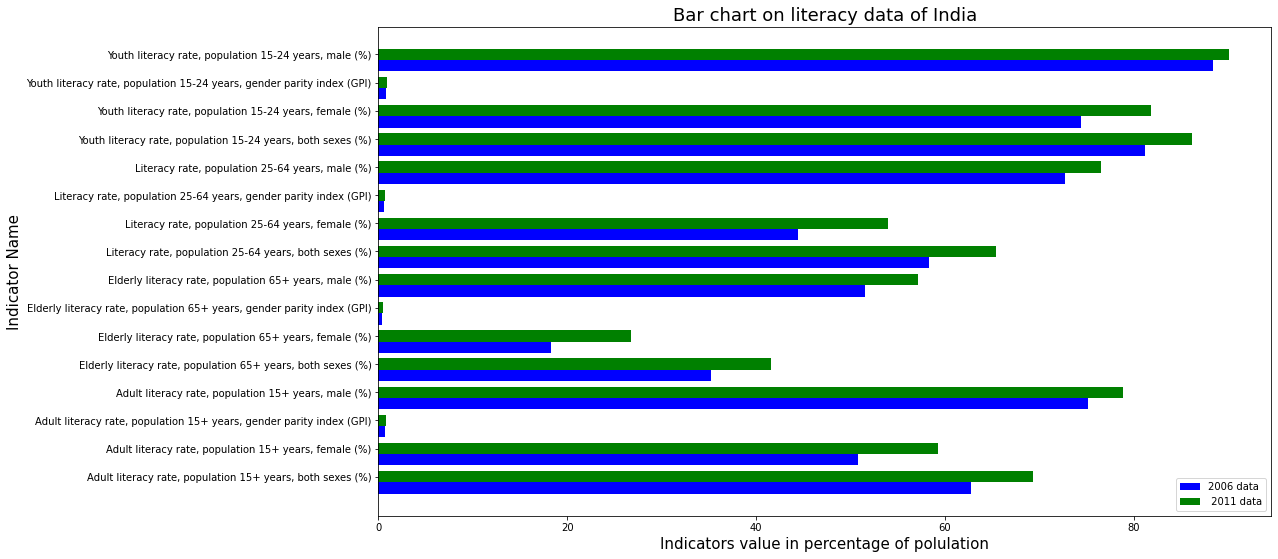

In [ ]:
plt.figure(figsize=(16,9))
 
indicator_index = np.arange(len(india_literacy_table['Indicator Name']))
 
width = 0.4
 
plt.barh(indicator_index, india_literacy_table['2006'], width , color = "b",
        label ="2006 data") #visible=False
 
plt.barh(indicator_index + width, india_literacy_table['2011'], width , color = "g",
        label =" 2011 data") 
 
 
plt.yticks(indicator_index + width, india_literacy_table['Indicator Name'], rotation = 0)
plt.title("Bar chart on literacy data of India", fontsize = 18)
plt.ylabel("Indicator Name",fontsize = 15)
plt.xlabel("Indicators value in percentage of polulation", fontsize = 15)
plt.legend()
plt.show()

##Let's do this analysis for our beloving neighbour 'Pakistan'

In [ ]:
Pakistan=stats_data.loc[stats_data['Country Name']=='Pakistan'].reset_index(drop=True)

##Extract literacy related data rows for now



In [ ]:
pakistan_literacy_table=Pakistan[Pakistan['Indicator Name'].str.contains('literacy', regex=False, case=False, na=False)].reset_index(drop=True)

In [ ]:
pakistan_literacy_table.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2014,2015,2016,2017
0,Pakistan,PAK,"Adult literacy rate, population 15+ years, bot...",SE.ADT.LITR.ZS,49.87364,54.15121,NaN,55.52637,54.89264,55.37519,54.73802,56.76434,55.59499,56.97715,56.97715,NaN,NaN,NaN
1,Pakistan,PAK,"Adult literacy rate, population 15+ years, fem...",SE.ADT.LITR.FE.ZS,35.36752,39.61323,NaN,40.08118,40.31462,41.01553,41.97539,43.07189,41.97494,44.28342,44.28342,NaN,NaN,NaN
2,Pakistan,PAK,"Adult literacy rate, population 15+ years, gen...",UIS.LR.AG15T99.GPI,0.55210,0.58555,NaN,0.58202,0.58744,0.59529,0.62658,0.61656,0.61162,0.64117,0.64117,NaN,NaN,NaN
3,Pakistan,PAK,"Adult literacy rate, population 15+ years, mal...",SE.ADT.LITR.MA.ZS,64.06048,67.65184,NaN,68.86610,68.62762,68.90061,66.99114,69.85822,68.62934,69.06681,69.06681,NaN,NaN,NaN
4,Pakistan,PAK,"Elderly literacy rate, population 65+ years, b...",UIS.LR.AG65,20.51553,24.35572,NaN,25.58964,24.85196,24.85196,23.97586,25.50246,24.50798,25.29323,25.29323,NaN,NaN,NaN


##In the above dataset let's drop those rows for which we don't have any data at all

In [ ]:
pakistan_literacy_table.dropna(axis=0,subset=['2005','2006',	'2007'	,'2008',	'2009'	,'2010',	'2011'	,'2012'	,'2013'	,'2014',	'2014'	,'2015'	,'2016'],how='all',inplace=True)

In [ ]:
pakistan_literacy_table.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2014,2015,2016,2017
0,Pakistan,PAK,"Adult literacy rate, population 15+ years, bot...",SE.ADT.LITR.ZS,49.87364,54.15121,NaN,55.52637,54.89264,55.37519,54.73802,56.76434,55.59499,56.97715,56.97715,NaN,NaN,NaN
1,Pakistan,PAK,"Adult literacy rate, population 15+ years, fem...",SE.ADT.LITR.FE.ZS,35.36752,39.61323,NaN,40.08118,40.31462,41.01553,41.97539,43.07189,41.97494,44.28342,44.28342,NaN,NaN,NaN
2,Pakistan,PAK,"Adult literacy rate, population 15+ years, gen...",UIS.LR.AG15T99.GPI,0.55210,0.58555,NaN,0.58202,0.58744,0.59529,0.62658,0.61656,0.61162,0.64117,0.64117,NaN,NaN,NaN
3,Pakistan,PAK,"Adult literacy rate, population 15+ years, mal...",SE.ADT.LITR.MA.ZS,64.06048,67.65184,NaN,68.86610,68.62762,68.90061,66.99114,69.85822,68.62934,69.06681,69.06681,NaN,NaN,NaN
4,Pakistan,PAK,"Elderly literacy rate, population 65+ years, b...",UIS.LR.AG65,20.51553,24.35572,NaN,25.58964,24.85196,24.85196,23.97586,25.50246,24.50798,25.29323,25.29323,NaN,NaN,NaN


In [ ]:
pakistan_literacy_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 49
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    16 non-null     object 
 1   Country Code    16 non-null     object 
 2   Indicator Name  16 non-null     object 
 3   Indicator Code  16 non-null     object 
 4   2005            16 non-null     float64
 5   2006            16 non-null     float64
 6   2007            0 non-null      float64
 7   2008            16 non-null     float64
 8   2009            16 non-null     float64
 9   2010            16 non-null     float64
 10  2011            16 non-null     float64
 11  2012            16 non-null     float64
 12  2013            16 non-null     float64
 13  2014            16 non-null     float64
 14  2014            16 non-null     float64
 15  2015            0 non-null      float64
 16  2016            0 non-null      float64
 17  2017            0 non-null      float

We can remove 2007,2015,2016,2017 column as it don't have any data

In [ ]:
pakistan_literacy_table.drop(columns=['2007','2015','2016','2017'],inplace=True)

In [ ]:
# This data have two 2014 column so let's drop the duplicate
pakistan_literacy_table=pakistan_literacy_table.loc[:,~pakistan_literacy_table.columns.duplicated()]

In [ ]:
pakistan_literacy_table.reset_index(drop=True,inplace=True)

In [ ]:
pakistan_literacy_table.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2008,2009,2010,2011,2012,2013,2014
0,Pakistan,PAK,"Adult literacy rate, population 15+ years, bot...",SE.ADT.LITR.ZS,49.87364,54.15121,55.52637,54.89264,55.37519,54.73802,56.76434,55.59499,56.97715
1,Pakistan,PAK,"Adult literacy rate, population 15+ years, fem...",SE.ADT.LITR.FE.ZS,35.36752,39.61323,40.08118,40.31462,41.01553,41.97539,43.07189,41.97494,44.28342
2,Pakistan,PAK,"Adult literacy rate, population 15+ years, gen...",UIS.LR.AG15T99.GPI,0.55210,0.58555,0.58202,0.58744,0.59529,0.62658,0.61656,0.61162,0.64117
3,Pakistan,PAK,"Adult literacy rate, population 15+ years, mal...",SE.ADT.LITR.MA.ZS,64.06048,67.65184,68.86610,68.62762,68.90061,66.99114,69.85822,68.62934,69.06681
4,Pakistan,PAK,"Elderly literacy rate, population 65+ years, b...",UIS.LR.AG65,20.51553,24.35572,25.58964,24.85196,24.85196,23.97586,25.50246,24.50798,25.29323


In [ ]:
# making a copy of this dataframe for future use
pakistan_literacy_table_new=pakistan_literacy_table.copy()

Plot multiline to vizualise the trend of indicators

In [ ]:
pakistan_literacy_table[['2005','2006','2008','2009','2010','2011','2012','2013','2014']]

,2005,2006,2008,2009,2010,2011,2012,2013,2014
0,49.87364,54.15121,55.52637,54.89264,55.37519,54.73802,56.76434,55.59499,56.97715
1,35.36752,39.61323,40.08118,40.31462,41.01553,41.97539,43.07189,41.97494,44.28342
2,0.55210,0.58555,0.58202,0.58744,0.59529,0.62658,0.61656,0.61162,0.64117
3,64.06048,67.65184,68.86610,68.62762,68.90061,66.99114,69.85822,68.62934,69.06681
4,20.51553,24.35572,25.58964,24.85196,24.85196,23.97586,25.50246,24.50798,25.29323
5,7.68449,9.60072,9.23423,9.38757,23.75533,9.88372,9.48671,9.13180,9.96258
6,0.25725,0.27925,0.25502,0.26240,0.66402,0.29307,0.25776,0.25858,0.27902
7,29.87139,34.37976,36.20942,35.77518,35.77518,33.72525,36.80466,35.31457,35.70521
8,43.70568,47.76307,48.96559,48.20804,48.68411,48.02751,49.95342,48.79480,50.17697
9,27.32490,30.62113,30.06811,30.31176,30.98942,31.91161,32.66763,31.70222,33.77221


In [ ]:
# Dropping unnecessary columns
pakistan_literacy_table.drop(columns=['Country Name','Country Code','Indicator Code'],inplace=True)

In [ ]:
# Set indicator name as index
pakistan_literacy_table.set_index('Indicator Name',inplace=True)

In [ ]:
pakistan_literacy_table

,2005,2006,2008,2009,2010,2011,2012,2013,2014
Indicator Name,,,,,,,,,
"Adult literacy rate, population 15+ years, both sexes (%)",49.87364,54.15121,55.52637,54.89264,55.37519,54.73802,56.76434,55.59499,56.97715
"Adult literacy rate, population 15+ years, female (%)",35.36752,39.61323,40.08118,40.31462,41.01553,41.97539,43.07189,41.97494,44.28342
"Adult literacy rate, population 15+ years, gender parity index (GPI)",0.55210,0.58555,0.58202,0.58744,0.59529,0.62658,0.61656,0.61162,0.64117
"Adult literacy rate, population 15+ years, male (%)",64.06048,67.65184,68.86610,68.62762,68.90061,66.99114,69.85822,68.62934,69.06681
"Elderly literacy rate, population 65+ years, both sexes (%)",20.51553,24.35572,25.58964,24.85196,24.85196,23.97586,25.50246,24.50798,25.29323
"Elderly literacy rate, population 65+ years, female (%)",7.68449,9.60072,9.23423,9.38757,23.75533,9.88372,9.48671,9.13180,9.96258
"Elderly literacy rate, population 65+ years, gender parity index (GPI)",0.25725,0.27925,0.25502,0.26240,0.66402,0.29307,0.25776,0.25858,0.27902
"Elderly literacy rate, population 65+ years, male (%)",29.87139,34.37976,36.20942,35.77518,35.77518,33.72525,36.80466,35.31457,35.70521
"Literacy rate, population 25-64 years, both sexes (%)",43.70568,47.76307,48.96559,48.20804,48.68411,48.02751,49.95342,48.79480,50.17697


In [ ]:
pakistan_literacy_table.index

Index(['Adult literacy rate, population 15+ years, both sexes (%)',
       'Adult literacy rate, population 15+ years, female (%)',
       'Adult literacy rate, population 15+ years, gender parity index (GPI)',
       'Adult literacy rate, population 15+ years, male (%)',
       'Elderly literacy rate, population 65+ years, both sexes (%)',
       'Elderly literacy rate, population 65+ years, female (%)',
       'Elderly literacy rate, population 65+ years, gender parity index (GPI)',
       'Elderly literacy rate, population 65+ years, male (%)',
       'Literacy rate, population 25-64 years, both sexes (%)',
       'Literacy rate, population 25-64 years, female (%)',
       'Literacy rate, population 25-64 years, gender parity index (GPI)',
       'Literacy rate, population 25-64 years, male (%)',
       'Youth literacy rate, population 15-24 years, both sexes (%)',
       'Youth literacy rate, population 15-24 years, female (%)',
       'Youth literacy rate, population 15-24 years, 

In [ ]:
trans_pak_lit_tab=pakistan_literacy_table.T[['Adult literacy rate, population 15+ years, both sexes (%)', 'Adult literacy rate, population 15+ years, female (%)', 'Adult literacy rate, population 15+ years, male (%)', 'Elderly literacy rate, population 65+ years, both sexes (%)','Literacy rate, population 25-64 years, both sexes (%)',
       'Literacy rate, population 25-64 years, female (%)','Literacy rate, population 25-64 years, male (%)']]

In [ ]:
pakistan_literacy_table.transpose()

Indicator Name,"Adult literacy rate, population 15+ years, both sexes (%)","Adult literacy rate, population 15+ years, female (%)","Adult literacy rate, population 15+ years, gender parity index (GPI)","Adult literacy rate, population 15+ years, male (%)","Elderly literacy rate, population 65+ years, both sexes (%)","Elderly literacy rate, population 65+ years, female (%)","Elderly literacy rate, population 65+ years, gender parity index (GPI)","Elderly literacy rate, population 65+ years, male (%)","Literacy rate, population 25-64 years, both sexes (%)","Literacy rate, population 25-64 years, female (%)","Literacy rate, population 25-64 years, gender parity index (GPI)","Literacy rate, population 25-64 years, male (%)","Youth literacy rate, population 15-24 years, both sexes (%)","Youth literacy rate, population 15-24 years, female (%)","Youth literacy rate, population 15-24 years, gender parity index (GPI)","Youth literacy rate, population 15-24 years, male (%)"
2005,49.87364,35.36752,0.55210,64.06048,20.51553,7.68449,0.25725,29.87139,43.70568,27.32490,0.45270,60.36029,65.08658,53.08856,0.69259,76.65172
2006,54.15121,39.61323,0.58555,67.65184,24.35572,9.60072,0.27925,34.37976,47.76307,30.62113,0.47631,64.28887,69.16580,58.37056,0.73791,79.10218
2008,55.52637,40.08118,0.58202,68.86610,25.58964,9.23423,0.25502,36.20942,48.96559,30.06811,0.45530,66.04055,71.11291,61.24992,0.77121,79.42005
2009,54.89264,40.31462,0.58744,68.62762,24.85196,9.38757,0.26240,35.77518,48.20804,30.31176,0.46033,65.84823,70.67627,61.46266,0.77659,79.14432
2010,55.37519,41.01553,0.59529,68.90061,24.85196,23.75533,0.66402,35.77518,48.68411,30.98942,0.46879,66.10507,71.25962,62.29837,0.78359,79.50414
2011,54.73802,41.97539,0.62658,66.99114,23.97586,9.88372,0.29307,33.72525,48.02751,31.91161,0.49775,64.11115,70.76933,63.13681,0.80901,78.04242
2012,56.76434,43.07189,0.61656,69.85822,25.50246,9.48671,0.25776,36.80466,49.95342,32.66763,0.48707,67.06964,72.58342,64.47410,0.80303,80.28826
2013,55.59499,41.97494,0.61162,68.62934,24.50798,9.13180,0.25858,35.31457,48.79480,31.70222,0.48190,65.78542,71.63622,63.43800,0.79893,79.40381
2014,56.97715,44.28342,0.64117,69.06681,25.29323,9.96258,0.27902,35.70521,50.17697,33.77221,0.50980,66.24577,72.79540,65.54779,0.82175,79.76598


Text(0.5, 0, 'Year')

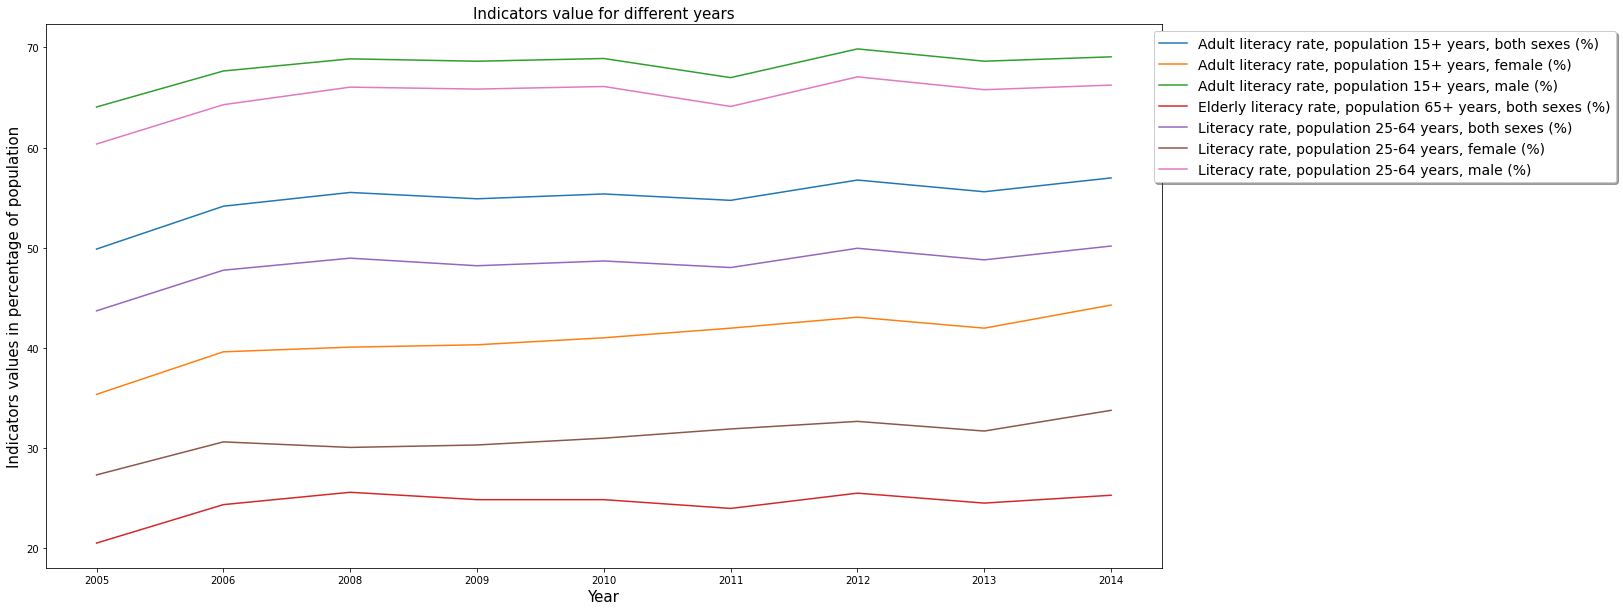

In [ ]:
trans_pak_lit_tab.plot(figsize=(20,10))

plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1),shadow=True,fontsize=14)
plt.title('Indicators value for different years',fontsize=15)
plt.ylabel('Indicators values in percentage of population',fontsize=15)
plt.xlabel('Year',fontsize=15)

#Let's do this analysis for upper medium income group country like China

In [ ]:
China=stats_data.loc[stats_data['Country Name']=='China'].reset_index(drop=True)

In [ ]:
China.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    3665 non-null   object 
 1   Country Code    3665 non-null   object 
 2   Indicator Name  3665 non-null   object 
 3   Indicator Code  3665 non-null   object 
 4   2005            653 non-null    float64
 5   2006            563 non-null    float64
 6   2007            622 non-null    float64
 7   2008            619 non-null    float64
 8   2009            713 non-null    float64
 9   2010            1368 non-null   float64
 10  2011            566 non-null    float64
 11  2012            642 non-null    float64
 12  2013            678 non-null    float64
 13  2014            561 non-null    float64
 14  2014            561 non-null    float64
 15  2015            751 non-null    float64
 16  2016            72 non-null     float64
 17  2017            0 non-null      f

In [ ]:
# Let's filter out those rows only which contains the literacy data
china_literacy_data=China[China['Indicator Name'].str.contains('literacy', regex=False, case=False, na=False)].reset_index(drop=True)

In [ ]:
china_literacy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    50 non-null     object 
 1   Country Code    50 non-null     object 
 2   Indicator Name  50 non-null     object 
 3   Indicator Code  50 non-null     object 
 4   2005            0 non-null      float64
 5   2006            0 non-null      float64
 6   2007            0 non-null      float64
 7   2008            0 non-null      float64
 8   2009            0 non-null      float64
 9   2010            16 non-null     float64
 10  2011            0 non-null      float64
 11  2012            0 non-null      float64
 12  2013            0 non-null      float64
 13  2014            0 non-null      float64
 14  2014            0 non-null      float64
 15  2015            0 non-null      float64
 16  2016            0 non-null      float64
 17  2017            0 non-null      float

In [ ]:
# Updating our data frame with only 2010 column only
china_literacy_data=china_literacy_data[['Indicator Name','2010']]

In [ ]:
# Drop those rows which have nan values
china_literacy_data.dropna(subset=['2010'],axis=0,inplace=True)

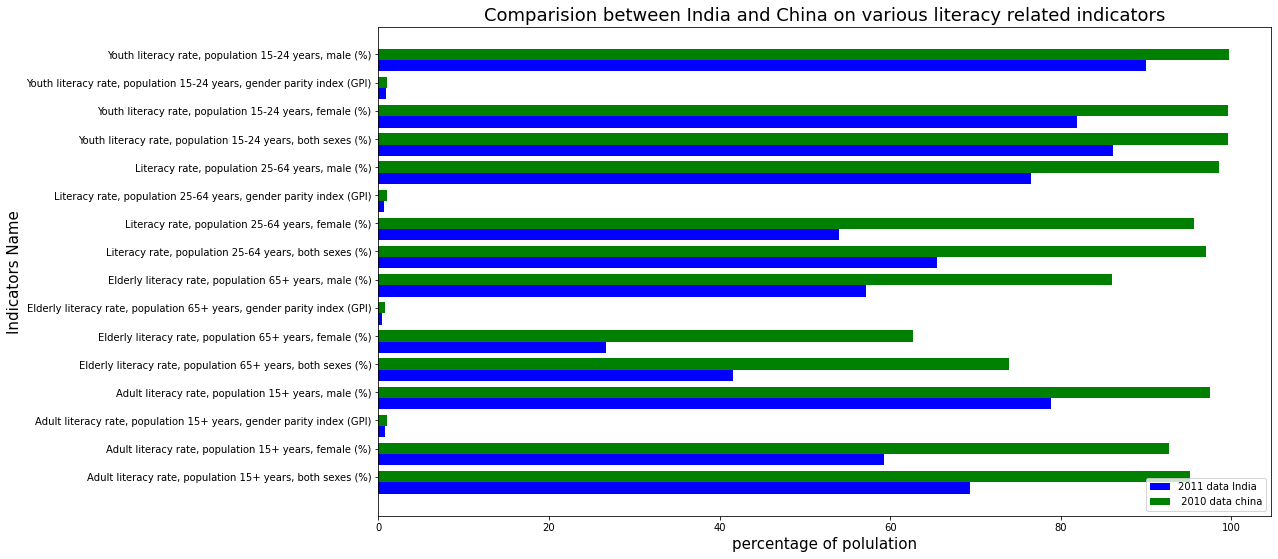

In [ ]:
plt.figure(figsize=(16,9))
 
indicator_index = np.arange(len(india_literacy_table['Indicator Name']))
 
width = 0.4
 
plt.barh(indicator_index, india_literacy_table['2011'], width , color = "b",
        label ="2011 data India") #visible=False
 
plt.barh(indicator_index + width, china_literacy_data['2010'], width , color = "g",
        label =" 2010 data china") 
 
 
plt.yticks(indicator_index + width, india_literacy_table['Indicator Name'], rotation = 0)
plt.title("Comparision between India and China on various literacy related indicators", fontsize = 18)
plt.ylabel("Indicators Name",fontsize = 15)
plt.xlabel("percentage of polulation", fontsize = 15)
plt.legend()
plt.show()

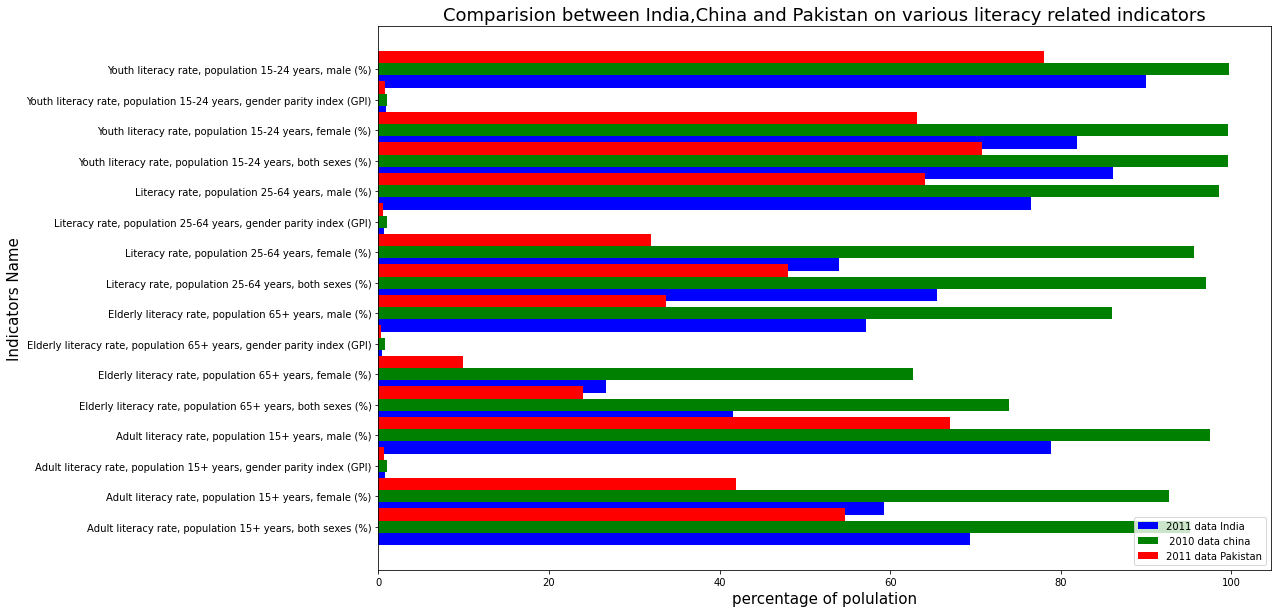

In [ ]:
plt.figure(figsize=(16,10))
 
indicator_index = np.arange(len(india_literacy_table['Indicator Name']))
 
width = 0.4
 
plt.barh(indicator_index, india_literacy_table['2011'], width , color = "b",
        label ="2011 data India") #visible=False
 
plt.barh(indicator_index + width, china_literacy_data['2010'], width , color = "g",
        label =" 2010 data china") 
plt.barh(indicator_index+width+width,pakistan_literacy_table_new['2011'],width,color='r',
         label='2011 data Pakistan')
 
 
plt.yticks(indicator_index + width, india_literacy_table['Indicator Name'], rotation = 0)
plt.title("Comparision between India,China and Pakistan on various literacy related indicators", fontsize = 18)
plt.ylabel("Indicators Name",fontsize = 15)
plt.xlabel("percentage of polulation", fontsize = 15)
plt.legend()
plt.show()

Observation
1.For country like India, Pakistan ,the literacy percentage for females is less than males, which is the reflection of their male dominat societies.

 2.Although India had got his independence 2 years before China but data is telling some other story. China is freed from his illiteracy.He is perfoming superb in every department.

###**Nepal(Low income country group)**

In [ ]:
Nepal=stats_data.loc[stats_data['Country Name']=='Nepal'].reset_index(drop=True)

In [ ]:
nepal_literacy_data=Nepal[Nepal['Indicator Name'].str.contains('literacy', regex=False, case=False, na=False)].reset_index(drop=True)

In [ ]:
nepal_literacy_data

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2014,2015,2016,2017
0,Nepal,NPL,"Adult literacy rate, population 15+ years, bot...",SE.ADT.LITR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,59.62725,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nepal,NPL,"Adult literacy rate, population 15+ years, fem...",SE.ADT.LITR.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,48.83759,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Nepal,NPL,"Adult literacy rate, population 15+ years, gen...",UIS.LR.AG15T99.GPI,NaN,NaN,NaN,NaN,NaN,NaN,0.68106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Nepal,NPL,"Adult literacy rate, population 15+ years, mal...",SE.ADT.LITR.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,71.70838,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Nepal,NPL,"Elderly literacy rate, population 65+ years, b...",UIS.LR.AG65,NaN,NaN,NaN,NaN,NaN,NaN,20.78409,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Nepal,NPL,"Elderly literacy rate, population 65+ years, f...",UIS.LR.AG65.F,NaN,NaN,NaN,NaN,NaN,NaN,6.02554,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Nepal,NPL,"Elderly literacy rate, population 65+ years, g...",UIS.LR.AG65.GPI,NaN,NaN,NaN,NaN,NaN,NaN,0.16909,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Nepal,NPL,"Elderly literacy rate, population 65+ years, m...",UIS.LR.AG65.M,NaN,NaN,NaN,NaN,NaN,NaN,35.63504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Nepal,NPL,"Literacy rate, population 25-64 years, both se...",UIS.LR.AG25T64,NaN,NaN,NaN,NaN,NaN,NaN,52.16770,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Nepal,NPL,"Literacy rate, population 25-64 years, female (%)",UIS.LR.AG25T64.F,NaN,NaN,NaN,NaN,NaN,NaN,38.49667,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# filtering our data with usefull columns only
nepal_literacy_data=nepal_literacy_data[['Indicator Name','2011']]

In [ ]:
# droping the rows containing nan values
nepal_literacy_data=nepal_literacy_data.dropna(subset=['2011'],axis=0).reset_index(drop=True)

In [ ]:
nepal_literacy_data

,Indicator Name,2011
0,"Adult literacy rate, population 15+ years, bot...",59.62725
1,"Adult literacy rate, population 15+ years, fem...",48.83759
2,"Adult literacy rate, population 15+ years, gen...",0.68106
3,"Adult literacy rate, population 15+ years, mal...",71.70838
4,"Elderly literacy rate, population 65+ years, b...",20.78409
5,"Elderly literacy rate, population 65+ years, f...",6.02554
6,"Elderly literacy rate, population 65+ years, g...",0.16909
7,"Elderly literacy rate, population 65+ years, m...",35.63504
8,"Literacy rate, population 25-64 years, both se...",52.16770
9,"Literacy rate, population 25-64 years, female (%)",38.49667


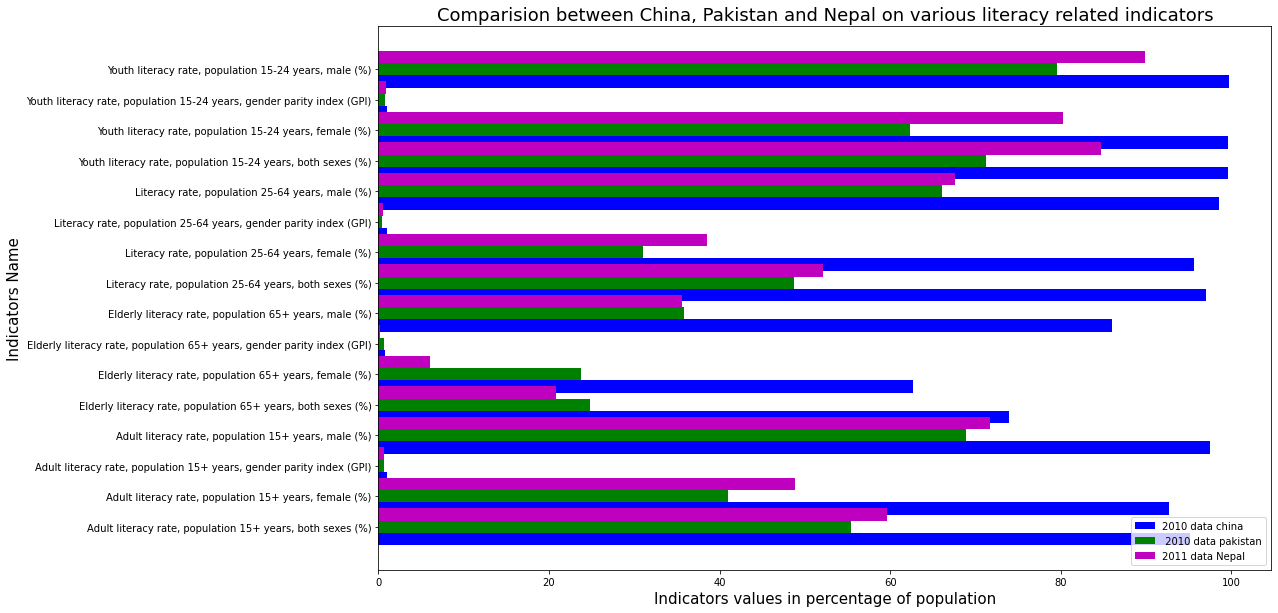

In [ ]:
plt.figure(figsize=(16,10))
 
indicator_index = np.arange(len(china_literacy_data['Indicator Name']))
 
width = 0.4
 
plt.barh(indicator_index, china_literacy_data['2010'], width , color = "b",
        label ="2010 data china") #visible=False
 
plt.barh(indicator_index + width, pakistan_literacy_table_new['2010'], width , color = "g",
        label =" 2010 data pakistan") 
plt.barh(indicator_index+width+width,nepal_literacy_data['2011'],width,color='m',
         label='2011 data Nepal')
 
 
plt.yticks(indicator_index + width, india_literacy_table['Indicator Name'], rotation = 0)
plt.title("Comparision between China, Pakistan and Nepal on various literacy related indicators", fontsize = 18)
plt.ylabel("Indicators Name",fontsize = 15)
plt.xlabel("Indicators values in percentage of population", fontsize = 15)
plt.legend()
plt.show()

**Nepal is doing really great than it's same economic group**

###**Correlation between an indicator and income levels of various countries**

In [ ]:
def income_correlation(df_stats,df_stats_country,indicator,plot=True):
  df_stats_income = df_stats_country[['Short Name','Income Group']].merge(df_stats,how='inner',left_on='Short Name',right_on='Country Name')
  income_dict = {'Low income':1,'Lower middle income':2,'Upper middle income':3,'High income: OECD':4,'High income: nonOECD':4,np.nan:np.nan}
  df_stats_income['Income'] = df_stats_income['Income Group'].apply(lambda x: income_dict[x])
  req_df = df_stats_income[(~df_stats_income['Income'].isna()) & (df_stats_income['Indicator Name']==indicator)]
  req_df[indicator] = req_df.iloc[:,6:].mean(axis=1)
  y = req_df['Income']
  if plot:
    sns.catplot(x='Income',y=indicator,data=req_df)
  return np.corrcoef(req_df[indicator],y)[0,1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


-0.3622381203131183

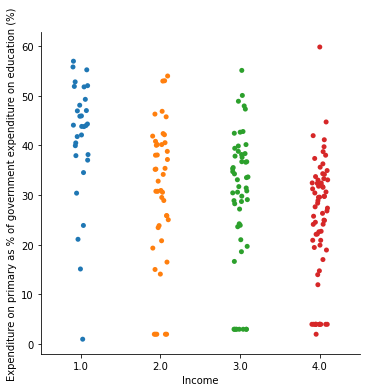

In [ ]:
indicator = 'Expenditure on primary as % of government expenditure on education (%)'
income_correlation(df_StatsData,df_StatsCountry,indicator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0.14915261272928648

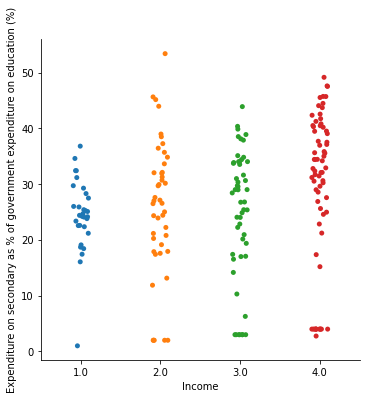

In [ ]:
indicator = 'Expenditure on secondary as % of government expenditure on education (%)'
income_correlation(df_StatsData,df_StatsCountry,indicator)

**Correlation between two indicators of various income groups over years**

In [ ]:
high_complete_stats_df = new_stats_data.copy()

In [ ]:
def get_correlation_indicators(indicator1,indicator2):
  '''
    This function takes two indicators as input and returns a correlation lmplot
  '''
  high_complete_stats_df1 = high_complete_stats_df[high_complete_stats_df['Indicator Name']==indicator1]
  high_complete_stats_df2 = high_complete_stats_df[high_complete_stats_df['Indicator Name']==indicator2]
  high_complete_stats_df1 = high_complete_stats_df1[high_complete_stats_df1['Country Name'].isin(high_complete_stats_df2['Country Name'].values)]
  high_complete_stats_df2 = high_complete_stats_df2[high_complete_stats_df2['Country Name'].isin(high_complete_stats_df1['Country Name'].values)]

  corrcoef = np.corrcoef(np.mean(high_complete_stats_df1.loc[:,'2000':'2015'],axis=1).T.values,np.mean(high_complete_stats_df2.loc[:,'2000':'2015'],axis=1).T.values)[1,0]
  df = pd.DataFrame()
  df[indicator1] = np.mean(high_complete_stats_df1.loc[:,'2000':'2015'],axis=1).T.values
  df[indicator2] = np.mean(high_complete_stats_df2.loc[:,'2000':'2015'],axis=1).T.values
  print(f'Correlation coefficient between {indicator1} and {indicator2} is : {corrcoef}')
  sns.lmplot(x=indicator1,y=indicator2,data=df)
  '''
  plt.scatter(df[indicator1],df[indicator2])
  plt.xlabel(indicator1)
  plt.ylabel(indicator2)'''

**Correlation coefficient between Adjusted net enrolment rate, primary, both sexes (%) and PISA: Mean performance on the mathematics scale** 

Correlation coefficient between Adjusted net enrolment rate, primary, both sexes (%) and PISA: Mean performance on the mathematics scale is : 0.3657632097949975


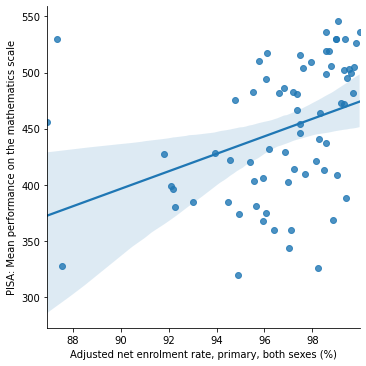

In [ ]:
get_correlation_indicators(enrolment_indicator[0],'PISA: Mean performance on the mathematics scale')

**Correlation coefficient between PISA: Mean performance on the reading scale and PISA: Mean performance on the mathematics scale**

Correlation coefficient between PISA: Mean performance on the reading scale and PISA: Mean performance on the mathematics scale is : 0.9485179964679625


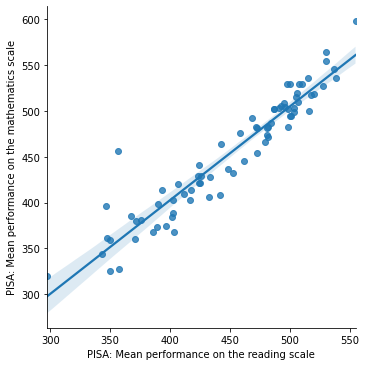

In [ ]:
get_correlation_indicators('PISA: Mean performance on the reading scale','PISA: Mean performance on the mathematics scale')

**Correlation coefficient between PISA: Mean performance on the reading scale and PISA: Mean performance on the science scale** 

Correlation coefficient between PISA: Mean performance on the reading scale and PISA: Mean performance on the science scale is : 0.9786986153417607


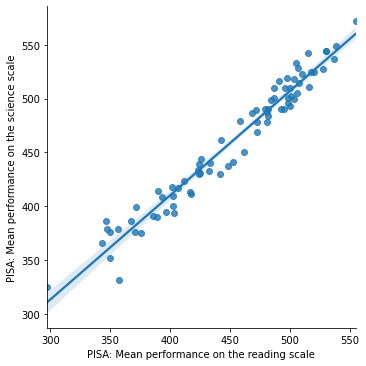

In [ ]:
get_correlation_indicators('PISA: Mean performance on the reading scale','PISA: Mean performance on the science scale')

Correlation coefficient between Population growth (annual %) and Share of youth not in education, employment, or training, total (% of youth population) is : 0.2482481763730468


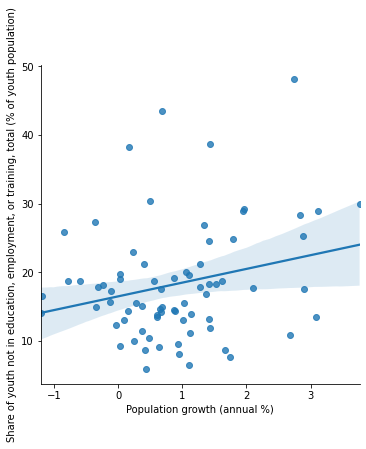

In [ ]:
get_correlation_indicators('Population growth (annual %)','Share of youth not in education, employment, or training, total (% of youth population)')

**Correlation coefficient between Population growth (annual %) and Adult literacy rate, population 15+ years, both sexes (%)**

Correlation coefficient between Population growth (annual %) and Adult literacy rate, population 15+ years, both sexes (%) is : -0.49304454323705954


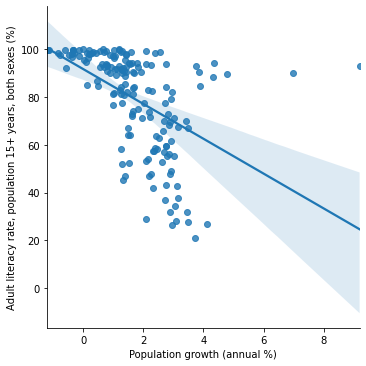

In [ ]:
get_correlation_indicators('Population growth (annual %)','Adult literacy rate, population 15+ years, both sexes (%)')

**Correlation coefficient between Adult literacy rate, population 15+ years, both sexes (%) and Government expenditure on education as % of GDP (%)**

Correlation coefficient between Adult literacy rate, population 15+ years, both sexes (%) and Government expenditure on education as % of GDP (%) is : 0.240515469281603


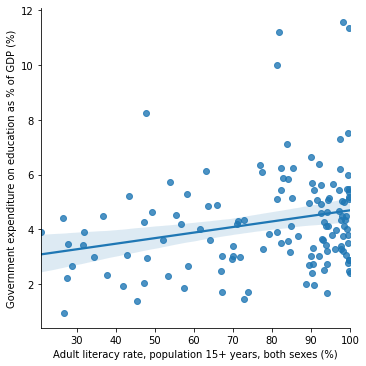

In [ ]:
# Government expenditure on education as % of GDP (%)
# Adult literacy rate, population 15+ years, both sexes (%)
get_correlation_indicators('Adult literacy rate, population 15+ years, both sexes (%)','Government expenditure on education as % of GDP (%)')

**Correlation coefficient between Adult literacy rate, population 15+ years, both sexes (%) and Government expenditure on education as % of GDP (%)**

Correlation coefficient between Adult literacy rate, population 15+ years, both sexes (%) and Government expenditure on education as % of GDP (%) is : 0.240515469281603


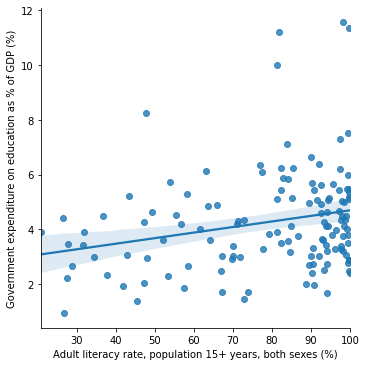

In [ ]:
get_correlation_indicators('Adult literacy rate, population 15+ years, both sexes (%)','Government expenditure on education as % of GDP (%)')

**Correlation coefficient between Government expenditure on education as % of GDP (%) and Share of youth not in education, employment, or training, total (% of youth population)**

Correlation coefficient between Government expenditure on education as % of GDP (%) and Share of youth not in education, employment, or training, total (% of youth population) is : -0.3155031411413797


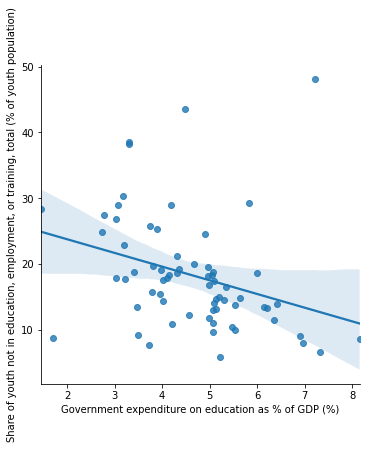

In [ ]:
plt.rcParams['figure.figsize'] = (6,6)
get_correlation_indicators('Government expenditure on education as % of GDP (%)','Share of youth not in education, employment, or training, total (% of youth population)')

**Correlation coefficient between Government expenditure on education as % of GDP (%) and Government expenditure in educational institutions as % of GDP (%)**

Correlation coefficient between Government expenditure on education as % of GDP (%) and Government expenditure in educational institutions as % of GDP (%) is : 0.9498332312174266


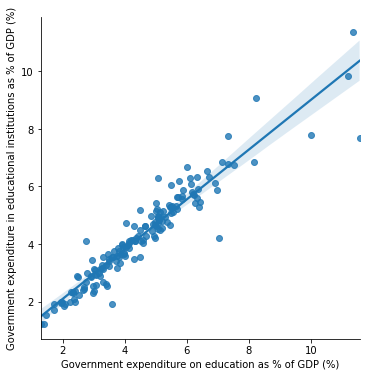

In [ ]:
get_correlation_indicators('Government expenditure on education as % of GDP (%)','Government expenditure in educational institutions as % of GDP (%)')

**Correlation coefficient between Government expenditure on tertiary education as % of GDP (%) and Share of youth not in education, employment, or training, total (% of youth population)**

Correlation coefficient between Government expenditure on tertiary education as % of GDP (%) and Share of youth not in education, employment, or training, total (% of youth population) is : -0.4617890108635398


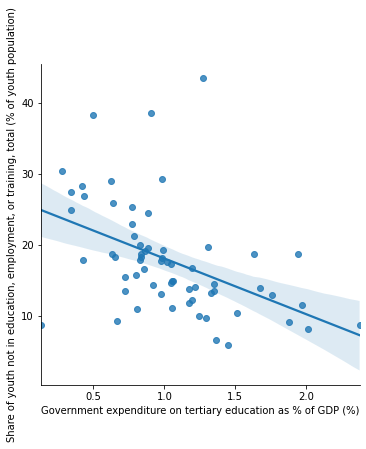

In [ ]:
get_correlation_indicators('Government expenditure on tertiary education as % of GDP (%)','Share of youth not in education, employment, or training, total (% of youth population)')